In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "P"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  P ['INSTRUÇÕES', 'Clínquer', '175']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('P', '175', array(['CPIIF40'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIIF40': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 325 non-null    object        
 1   (Data, Produção)                             325 non-null    datetime64[ns]
 2   (Horário, Produção)                          325 non-null    object        
 3   (Data, Medida)                               325 non-null    datetime64[ns]
 4   (Horário, Medida)                            325 non-null    object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        325 non-null    object        
 6   (Classe de resistência, Unnamed: 7_level_2)  325 non-null    int64         
 7   (Obs., Unnamed: 8_level_2)                   0 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 20.4+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float64

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  272 non-null    float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 17.9 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                325 non-null    float64
 1   MgO                325 non-null    float64
 2   Na2O               325 non-null    float64
 3   Al2O3              325 non-null    float64
 4   SiO2               325 non-null    float64
 5   SO3                325 non-null    float64
 6   K2O                325 non-null    float64
 7   TiO2               325 non-null    float64
 8   Fe2O3              325 non-null    float64
 9   Perda ao fogo      324 non-null    float64
 10  Resíduo insolúvel  324 non-null    float64
 11  Obs.               0 non-null      float64
dtypes: float64(12)
memory usage: 30.6 KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          272 non-null    float64
 1   C2S total          272 non-null    float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               272 non-null    float64
 6   C3A                272 non-null    float64
 7   C3A cubic          272 non-null    float64
 8   C3A orto           272 non-null    float64
 9   CaO livre          272 non-null    float64
 10  Portlandita        267 non-null    float64
 11  Periclasio         267 non-null    float64
 12  Arcanita           272 non-null    float64
 13  Aphthalita         272 non-null    float64
 14  Langbeinita        267 non-null    float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          245 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            325 non-null    int64  
 1   (Unnamed: 137_level_1, #200)              325 non-null    float64
 2   (Unnamed: 138_level_1, #325)              325 non-null    float64
 3   (Unnamed: 139_level_1, #400)              325 non-null    float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 15.4 KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           325 non-null    int64  
 1   (Tempo de pega, Fim)              325 non-null    int64  
 2   (Resistência à compressão, 1 d)   0 non-null      float64
 3   (Resistência à compressão, 3 d)   325 non-null    float64
 4   (Resistência à compressão, 7 d)   325 non-null    float64
 5   (Resistência à compressão, 28 d)  325 non-null    float64
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 17.9 KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Composição"].rename(
            {"Sulfato de cálcio": "Sulfato de cálcio (composição)"}, axis=1
        ),
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  325 non-null    object 
 1   (Cidade, Unnamed: 1_level_2)                                  325 non-null    object 
 2   (Data, Produção)                                              325 non-null    object 
 3   (Horário, Produção)                                           325 non-null    object 
 4   (Data, Medida)                                                325 non-null    object 
 5   (Horário, Medida)                                             325 non-null    object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         325 non-null    object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   325 non-n

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
    "Sulfato de cálcio (composição)": "Calcium sulfate (composition)",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "Calcium sulfate (composition)",
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(324, 54)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant               City       Date  Clínquer  Fíler calcário  \
0     P  Salto de Pirapora 2021-01-07       NaN             NaN   
1     P  Salto de Pirapora 2021-01-12       NaN             NaN   
2     P  Salto de Pirapora 2021-01-14       NaN             NaN   
3     P  Salto de Pirapora 2021-01-16       NaN             NaN   
4     P  Salto de Pirapora 2021-01-19       NaN             NaN   

   Cinza volante  Escória  Argila calcinada  Calcium sulfate (composition)  \
0            NaN      NaN               NaN                            NaN   
1            NaN      NaN               NaN                            NaN   
2            NaN      NaN               NaN                            NaN   
3            NaN      NaN               NaN                            NaN   
4            NaN      NaN               NaN                            NaN   

   Total C3S  ...  #325  #400  Specific Gravity  Initial setting time  \
0        NaN  ...  0.62  3.05               NaN                 220.0   
1        NaN  ...  0.62  2.73               NaN                 230.0   
2        NaN  ...  0.41  2.18               NaN                 225.0   
3        NaN  ...  0.41  2.40               NaN                 230.0   
4        NaN  ...  0.31  2.40               NaN                 230.0   

   Final setting time  CS1   CS3   CS7  CS28  Cement_Type  
0               270.0  NaN  36.7  40.5  46.4    CP II-F40  
1               280.0  NaN  35.4  40.4  46.6    CP II-F40  
2               270.0  NaN  34.9  39.9  45.4    CP II-F40  
3               280.0  NaN  37.0  42.0  46.5    CP II-F40  
4               280.0  NaN  36.6  40.7  47.4    CP II-F40  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant               City       Date  Clínquer  Fíler calcário  \
319     P  Salto de Pirapora 2023-04-20       NaN             NaN   
320     P  Salto de Pirapora 2023-04-25       NaN             NaN   
321     P  Salto de Pirapora 2023-04-27       NaN             NaN   
322     P  Salto de Pirapora 2023-04-29       NaN             NaN   
323     P  Salto de Pirapora 2023-05-02       NaN             NaN   

     Cinza volante  Escória  Argila calcinada  Calcium sulfate (composition)  \
319            NaN      NaN               NaN                           5.19   
320            NaN      NaN               NaN                           5.58   
321            NaN      NaN               NaN                           5.60   
322            NaN      NaN               NaN                           5.60   
323            NaN      NaN               NaN                           5.35   

     Total C3S  ...  #325  #400  Specific Gravity  Initial setting time  \
319      53.49  ...   1.2  2.23               NaN                 275.0   
320      52.75  ...   1.0  2.01               NaN                 250.0   
321      53.54  ...   1.2  2.33               NaN                 245.0   
322      53.07  ...   0.8  2.01               NaN                 265.0   
323      52.61  ...   0.9  2.65               NaN                 240.0   

     Final setting time  CS1   CS3   CS7  CS28  Cement_Type  
319               340.0  NaN  39.2  43.0  49.6    CP II-F40  
320               320.0  NaN  37.2  41.4  48.2    CP II-F40  
321               315.0  NaN  35.0  40.1  47.4    CP II-F40  
322               330.0  NaN  38.1  41.5  47.1    CP II-F40  
323               310.0  NaN  37.8  40.9  48.0    CP II-F40  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Plant                          324 non-null    object        
 1   City                           324 non-null    object        
 2   Date                           324 non-null    datetime64[ns]
 3   Clínquer                       0 non-null      float64       
 4   Fíler calcário                 0 non-null      float64       
 5   Cinza volante                  0 non-null      float64       
 6   Escória                        0 non-null      float64       
 7   Argila calcinada               0 non-null      float64       
 8   Calcium sulfate (composition)  272 non-null    float64       
 9   Total C3S                      272 non-null    float64       
 10  Total C2S                      272 non-null    float64       
 11  Alpha C2S          

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           50
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                 mean  \
Date                             324  2022-03-08 16:40:00   
Clínquer                         0.0                  NaN   
Fíler calcário                   0.0                  NaN   
Cinza volante                    0.0                  NaN   
Escória                          0.0                  NaN   
Argila calcinada                 0.0                  NaN   
Calcium sulfate (composition)  272.0             4.532684   
Total C3S                      272.0            52.321581   
Total C2S                      272.0            10.538493   
Alpha C2S                        0.0                  NaN   
Beta C2S                         0.0                  NaN   
Gamma C2S                        0.0                  NaN   
C4AF                           272.0             8.687132   
C3A                            272.0              5.71364   
Cubic C3A                      272.0             5.098309   
Orthorhombic C3A               272.0             0.615331   
Free CaO                       272.0             1.301875   
Portlandite                    267.0             1.066217   
Periclase                      267.0             3.752622   
Arcanite                       272.0             0.885404   
Aphthitalite                   272.0             0.221654   
Langbeinite                    267.0             0.157303   
Calcium sulfate                  0.0                  NaN   
Bassanite                      245.0             0.890245   
Anhydrite                        0.0                  NaN   
Calcite                        272.0            10.573824   
Dolimita                       272.0             0.102831   
Quartz                           0.0                  NaN   
Muscovite                        0.0                  NaN   
CaO                            324.0            59.925326   
MgO                            324.0             5.282347   
Na2O                           324.0             0.057765   
Al2O3                          324.0              4.35896   
SiO2                           324.0            17.837477   
SO3                            324.0             3.369004   
K2O                            324.0             0.900195   
TiO2                           324.0              0.21514   
Fe2O3                          324.0             2.579901   
Loss on Ignition               323.0              5.93065   
Insoluble Residue              323.0               1.3913   
Blaine                         324.0          4904.537037   
#200                           324.0             0.010123   
#325                           324.0             0.616728   
#400                           324.0             2.315617   
Specific Gravity                 0.0                  NaN   
Initial setting time           324.0           240.540123   
Final setting time             324.0           294.990741   
CS1                              0.0                  NaN   
CS3                            324.0            37.266049   
CS7                            324.0            41.756173   
CS28                           324.0            49.001852   

                                               min                  25%  \
Date                           2021-01-07 00:00:00  2021-08-04 12:00:00   
Clínquer                                       NaN                  NaN   
Fíler calcário                                 NaN                  NaN   
Cinza volante                                  NaN                  NaN   
Escória                                        NaN                  NaN   
Argila calcinada                               NaN                  NaN   
Calcium sulfate (composition)                 2.19                4.095   
Total C3S                                     46.2               51.045   
Total C2S                                      5.8                8.905   
Alpha C2S                                      NaN                  NaN   
Beta C2S                         

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                top freq                 mean  \
Plant         324      1                  P  324                  NaN   
City          324      1  Salto de Pirapora  324                  NaN   
Date          324    NaN                NaN  NaN  2022-03-08 16:40:00   
Cement_Type   324      1          CP II-F40  324                  NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-01-07 00:00:00  2021-08-04 12:00:00  2022-03-13 12:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
City                         NaN                  NaN  
Date         2022-10-06 12:00:00  2023-05-02 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['P'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-F40'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Salto de Pirapora'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
P    324
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP II-F40    324
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Salto de Pirapora    324
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_114747/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


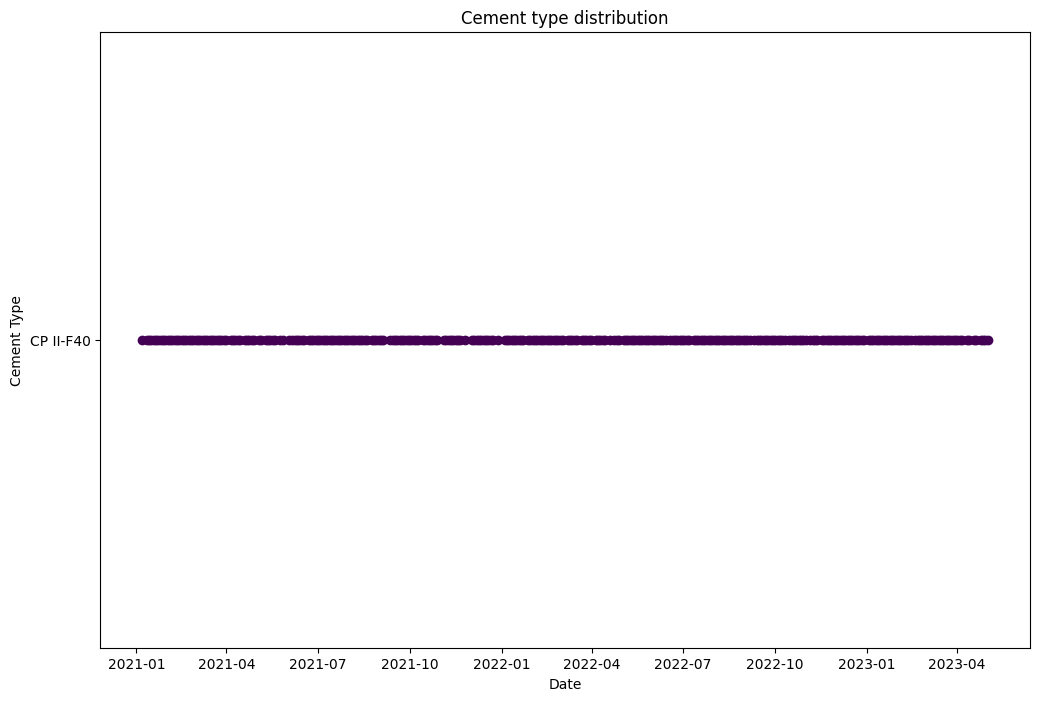

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-F40


<IPython.core.display.Javascript object>

In [39]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [41]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP II-F-40    324
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_114747/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


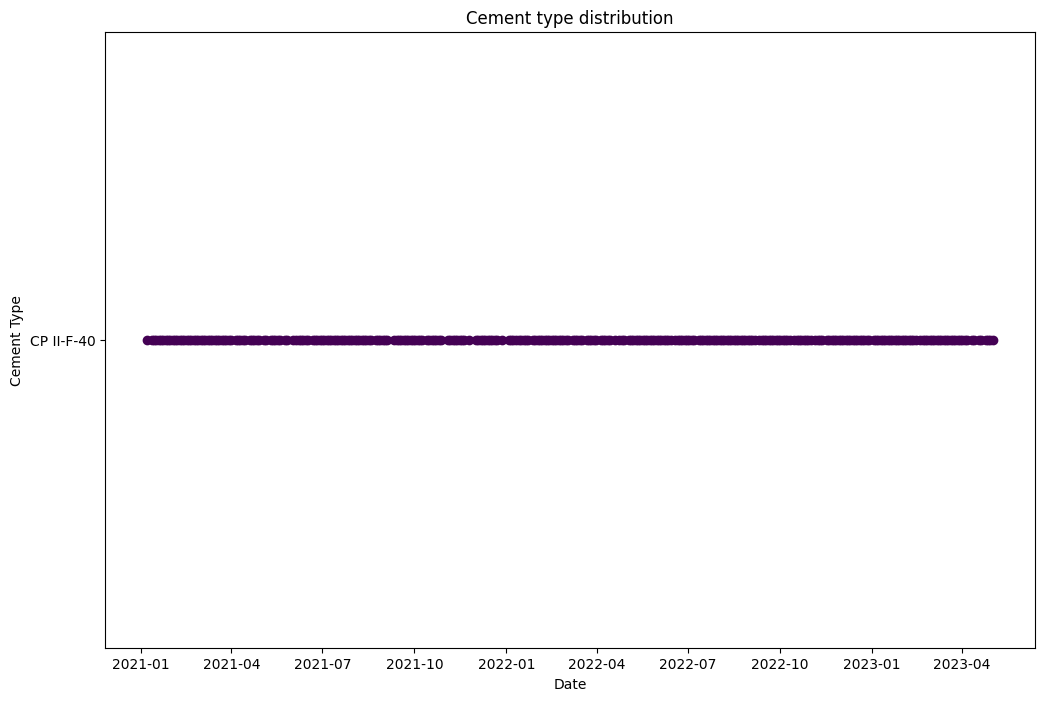

<IPython.core.display.Javascript object>

In [43]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [44]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

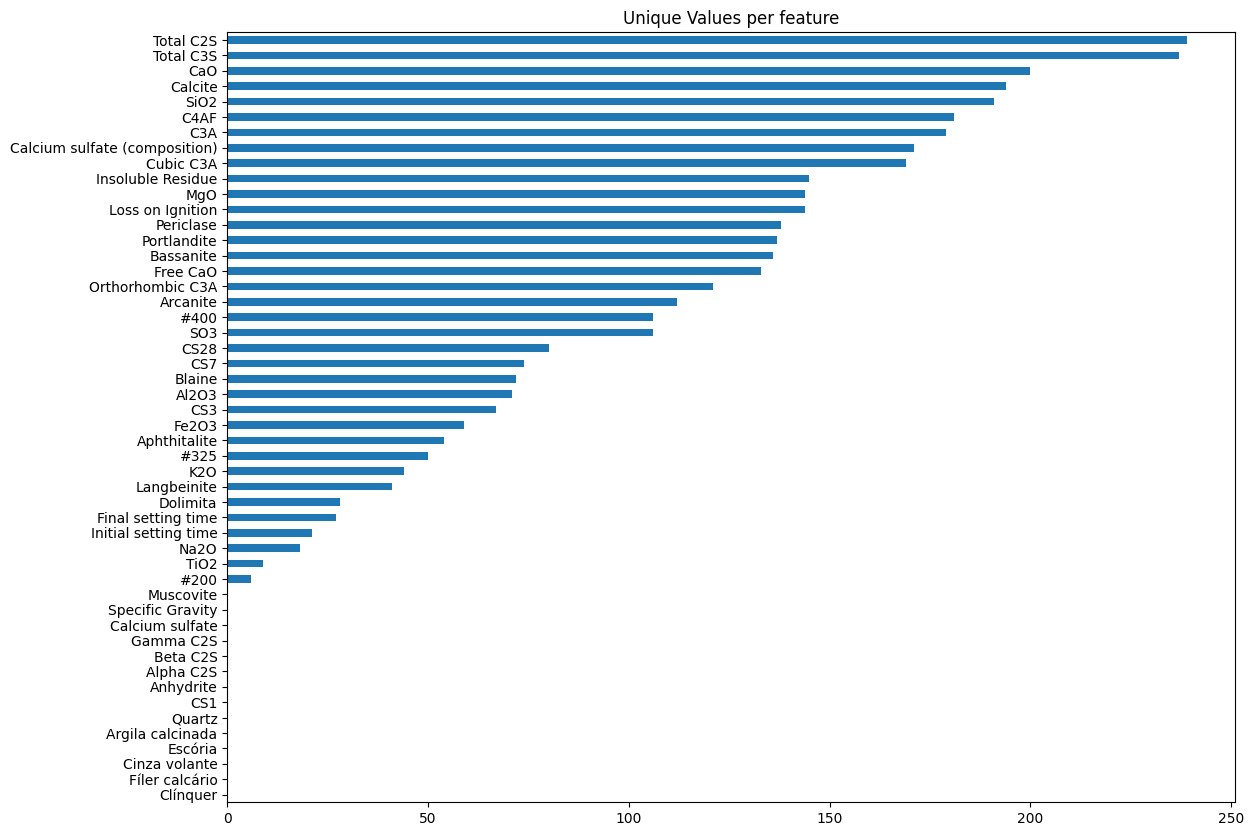

<IPython.core.display.Javascript object>

In [45]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

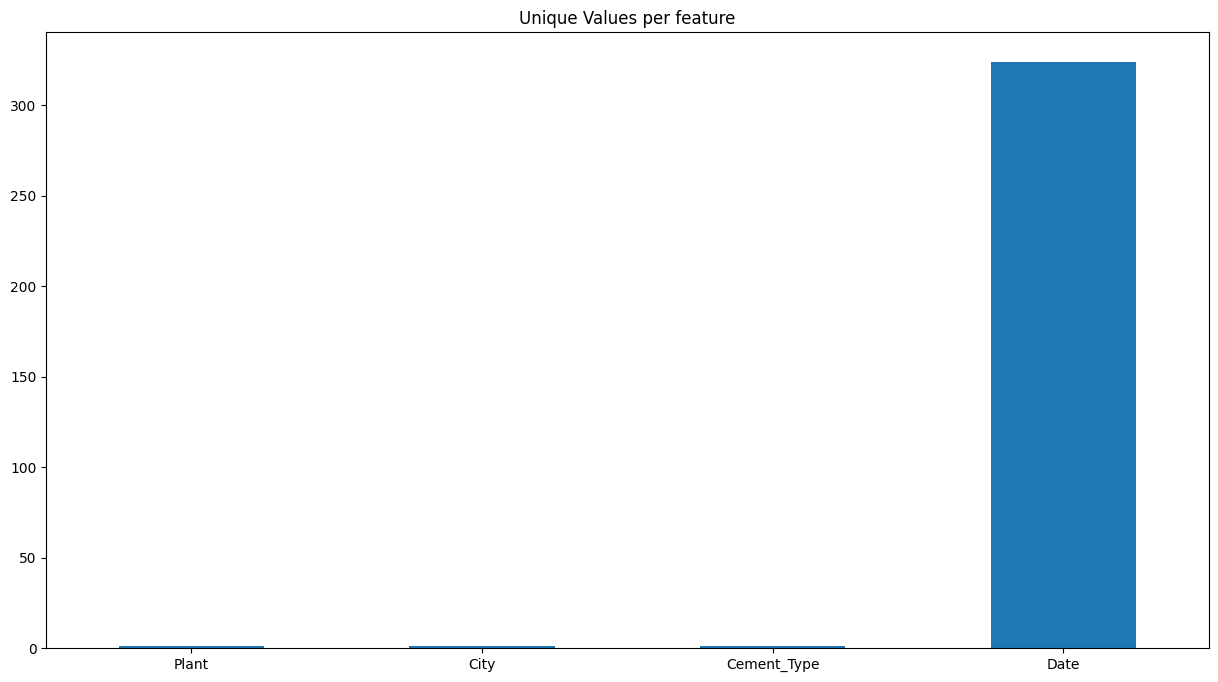

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

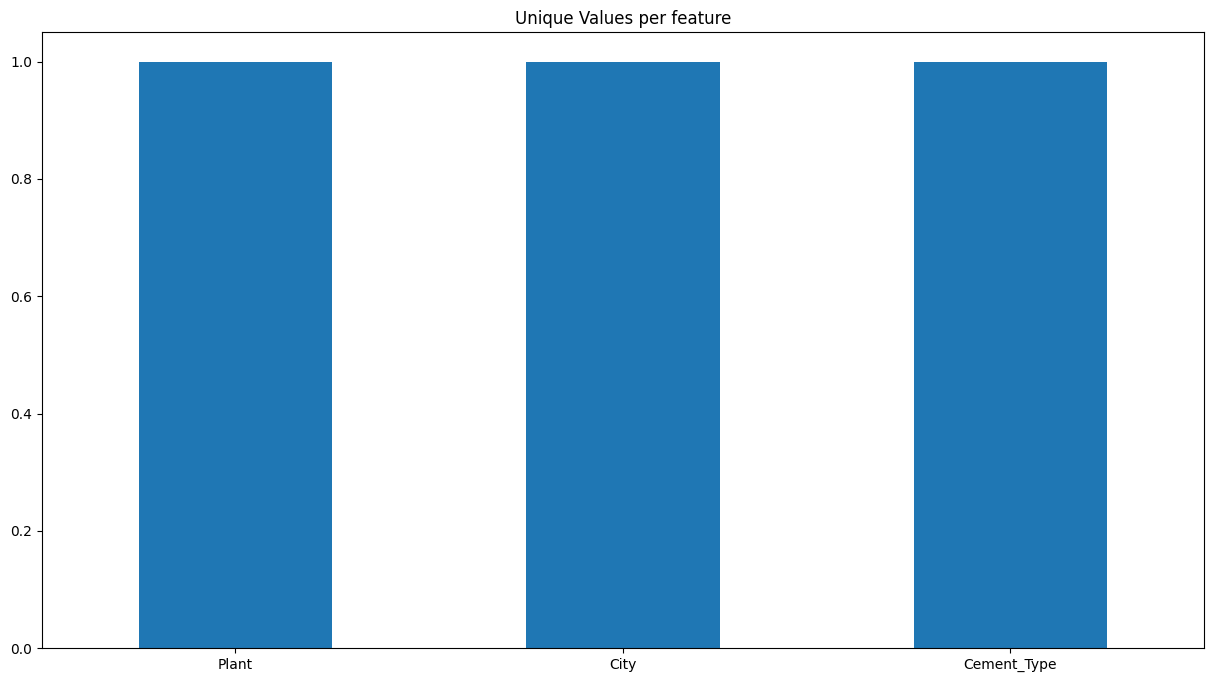

<IPython.core.display.Javascript object>

In [47]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [48]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 32 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [49]:
df.isna().any()

Plant                            False
City                             False
Date                             False
Clínquer                          True
Fíler calcário                    True
Cinza volante                     True
Escória                           True
Argila calcinada                  True
Calcium sulfate (composition)     True
Total C3S                         True
Total C2S                         True
Alpha C2S                         True
Beta C2S                          True
Gamma C2S                         True
C4AF                              True
C3A                               True
Cubic C3A                         True
Orthorhombic C3A                  True
Free CaO                          True
Portlandite                       True
Periclase                         True
Arcanite                          True
Aphthitalite                      True
Langbeinite                       True
Calcium sulfate                   True
Bassanite                

<IPython.core.display.Javascript object>

In [50]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [51]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

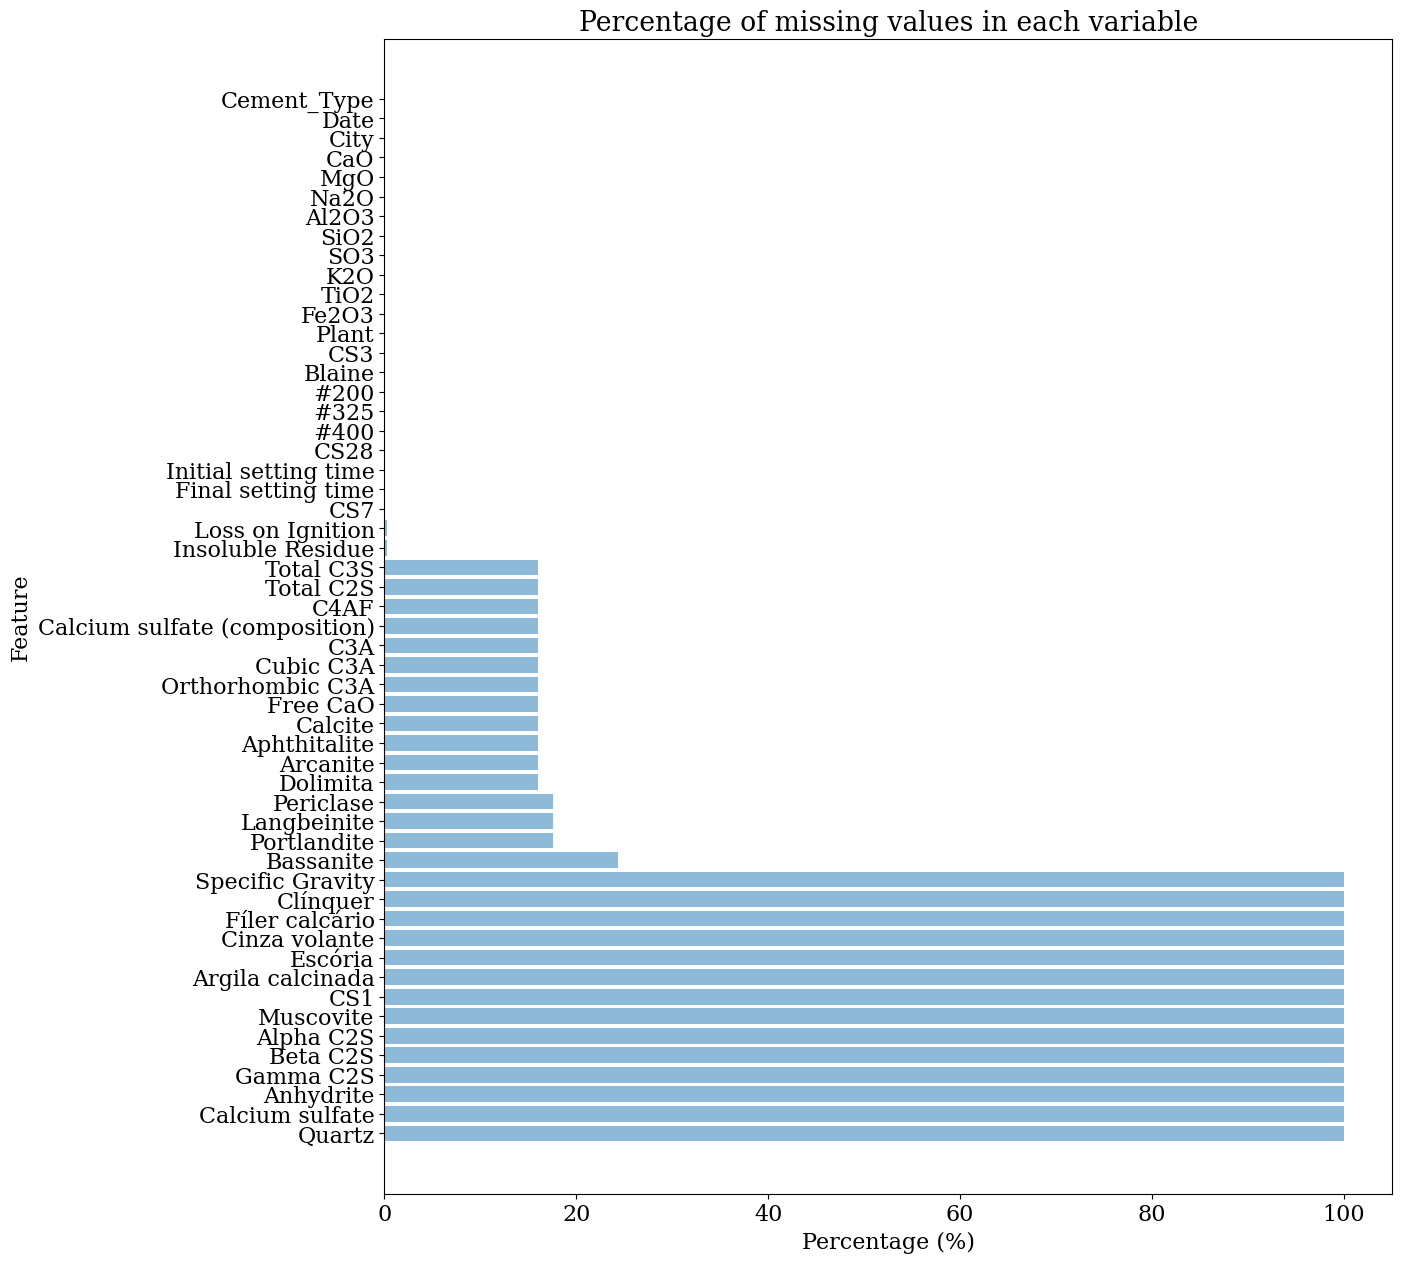

<IPython.core.display.Javascript object>

In [52]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [53]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [54]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Clínquer', 'Fíler calcário', 'Cinza volante', 'Escória',
       'Argila calcinada', 'Calcium sulfate (composition)', 'Total C3S',
       'Total C2S', 'Alpha C2S', 'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A',
       'Cubic C3A', 'Orthorhombic C3A', 'Free CaO', 'Portlandite', 'Periclase',
       'Arcanite', 'Aphthitalite', 'Langbeinite', 'Calcium sulfate',
       'Bassanite', 'Anhydrite', 'Calcite', 'Dolimita', 'Quartz', 'Muscovite',
       'CaO', 'MgO', 'Na2O', 'Al2O3', 'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3',
       'Loss on Ignition', 'Insoluble Residue', 'Blaine', '#200', '#325',
       '#400', 'Specific Gravity', 'Initial setting time',
       'Final setting time', 'CS1', 'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [56]:
zero_percentages

Zero (%) for P
#200                                88.888889
Dolimita                            46.296296
Langbeinite                          5.864198
Orthorhombic C3A                     2.469136
#325                                 0.925926
Bassanite                            0.308642
Aphthitalite                         0.308642
Fe2O3                                0.000000
MgO                                  0.000000
Na2O                                 0.000000
Al2O3                                0.000000
SiO2                                 0.000000
SO3                                  0.000000
K2O                                  0.000000
TiO2                                 0.000000
Loss on Ignition                     0.000000
Muscovite                            0.000000
Insoluble Residue                    0.000000
Blaine                               0.000000
#400                                 0.000000
Specific Gravity                     0.000000
Initial setting time                 0.000000
Final setting time                   0.000000
CS1                                  0.000000
CS3                                  0.000000
CS7                                  0.000000
CaO                                  0.000000
Clínquer                             0.000000
Quartz                               0.000000
Fíler calcário                       0.000000
Cinza volante                        0.000000
Escória                              0.000000
Argila calcinada                     0.000000
Calcium sulfate (composition)        0.000000
Total C3S                            0.000000
Total C2S                            0.000000
Alpha C2S                            0.000000
Beta C2S                             0.000000
Gamma C2S                            0.000000
C4AF                                 0.000000
C3A                                  0.000000
Cubic C3A                            0.000000
Free CaO                             0.000000
Portlandite                          0.000000
Periclase                            0.000000
Arcanite                             0.000000
Calcium sulfate                      0.000000
Anhydrite                            0.000000
Calcite                              0.000000
CS28                                 0.000000

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [57]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

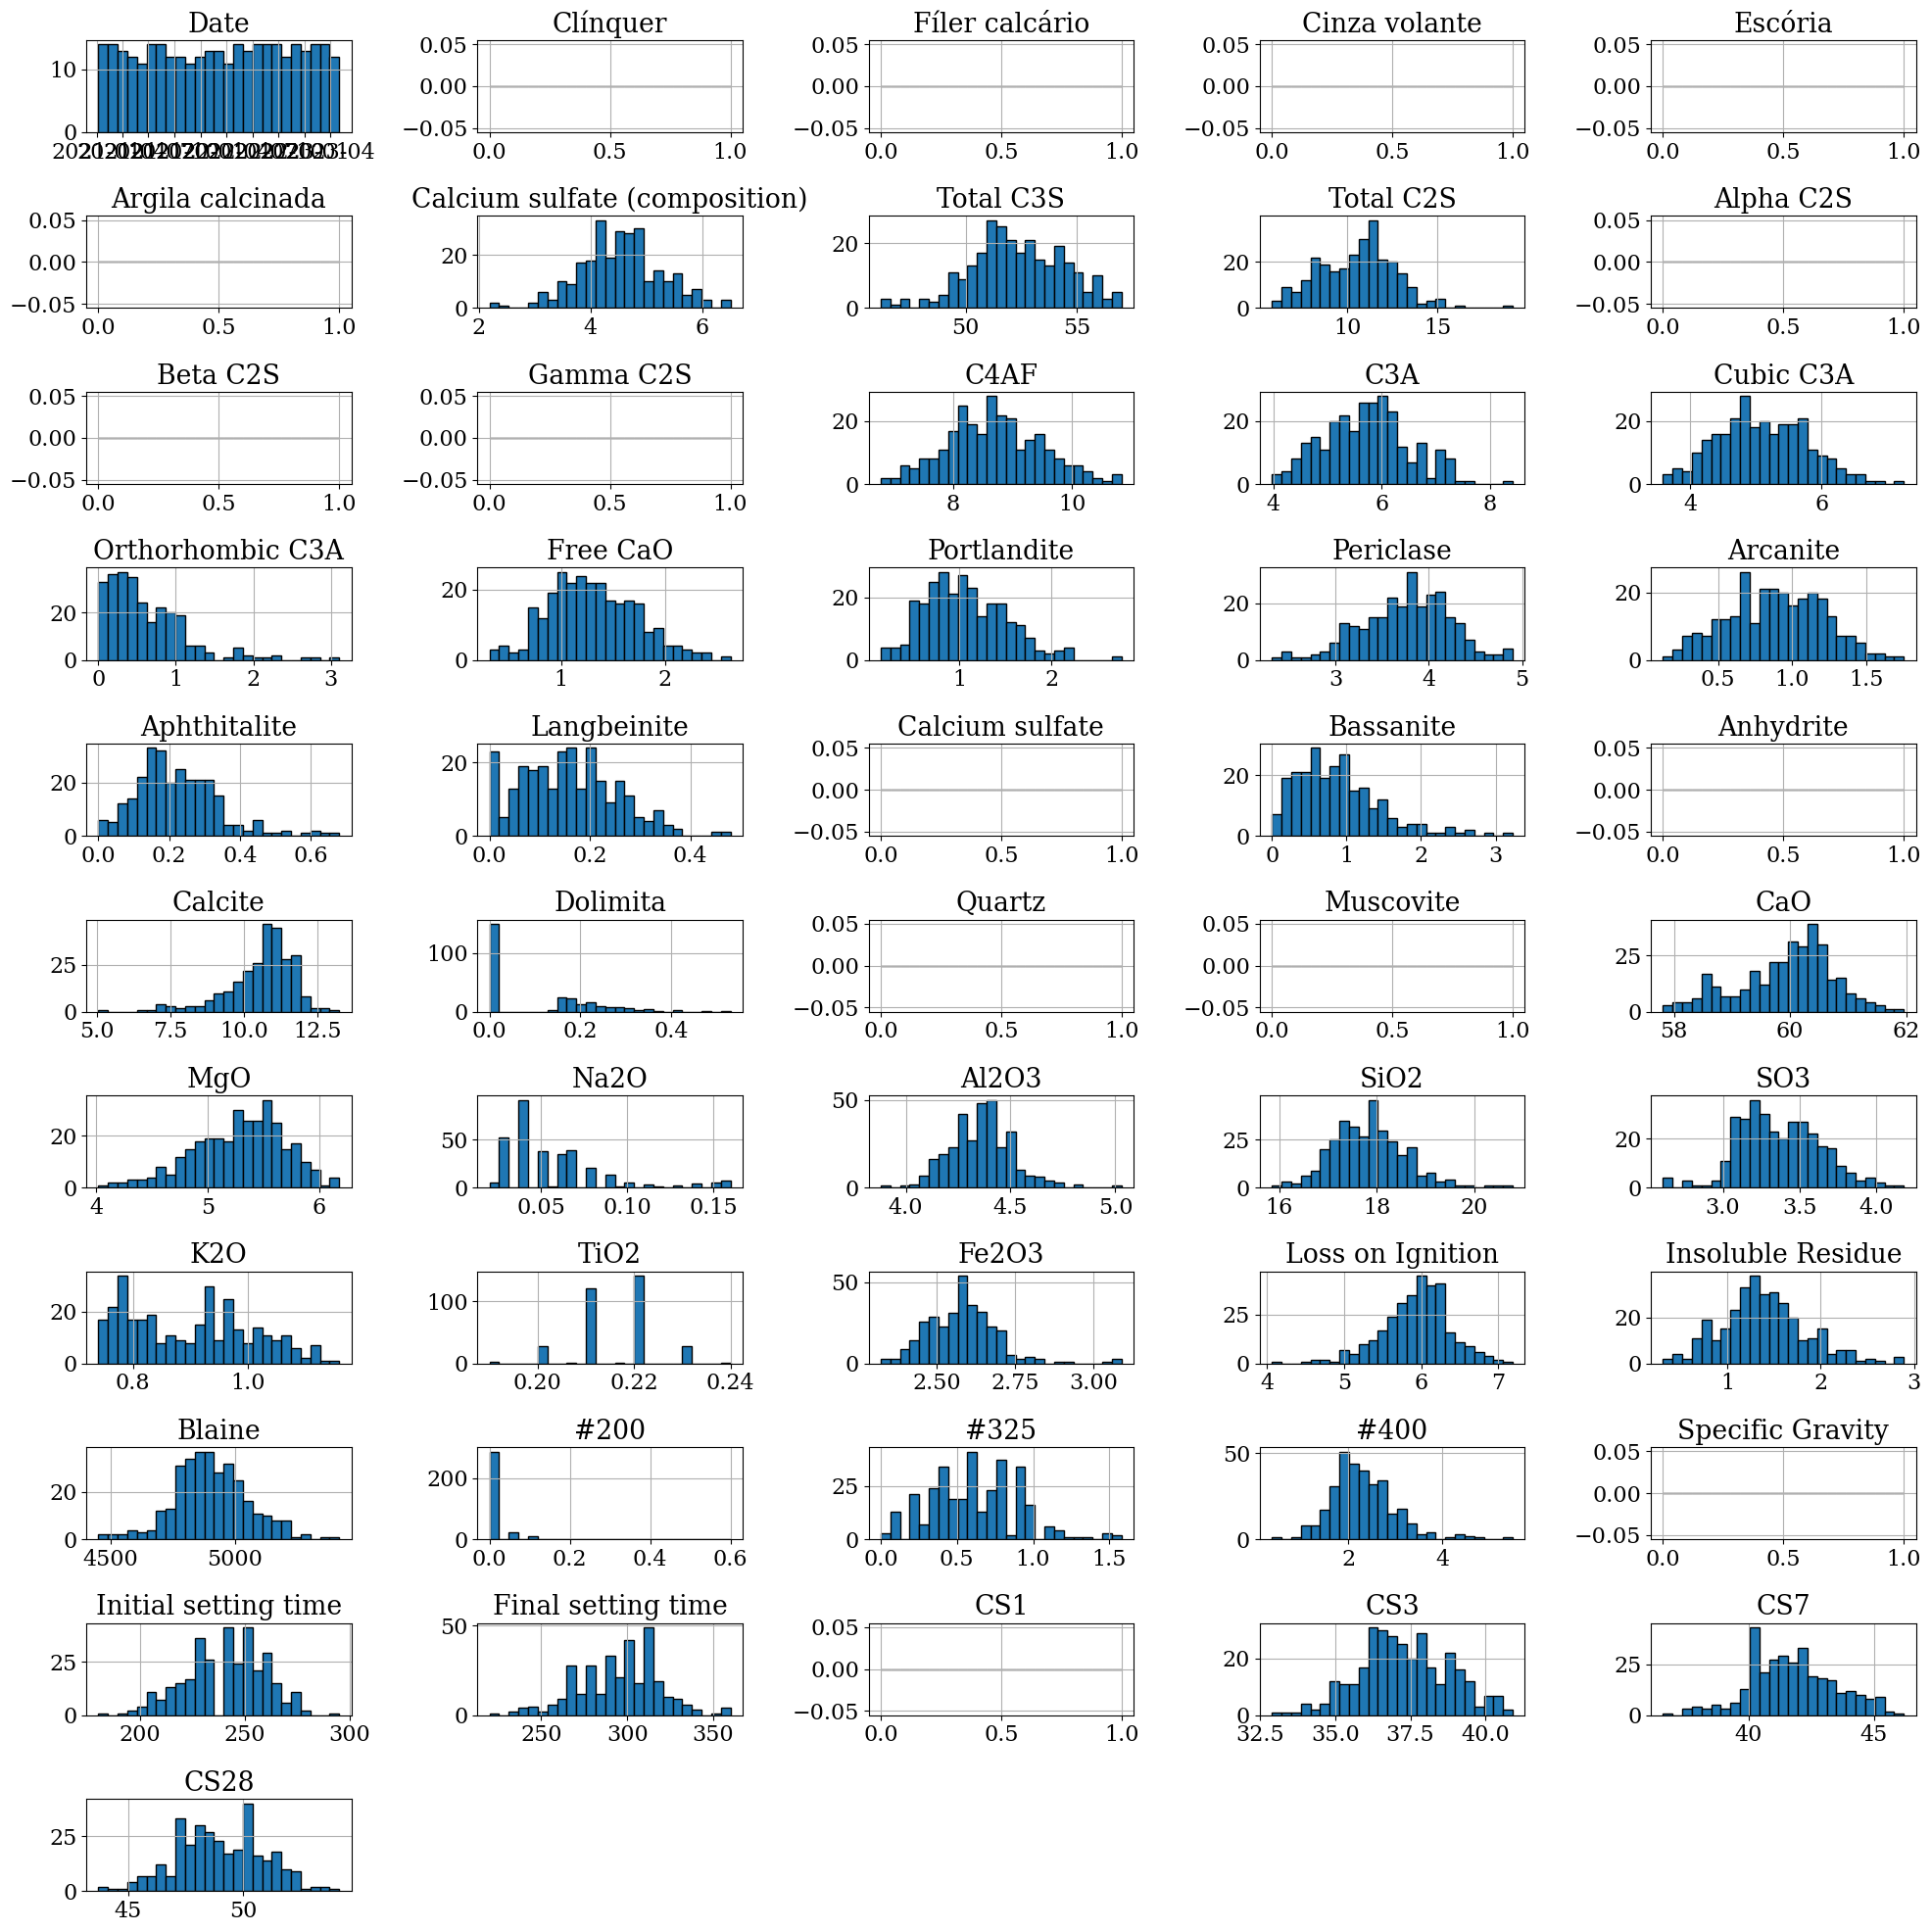

<IPython.core.display.Javascript object>

In [58]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

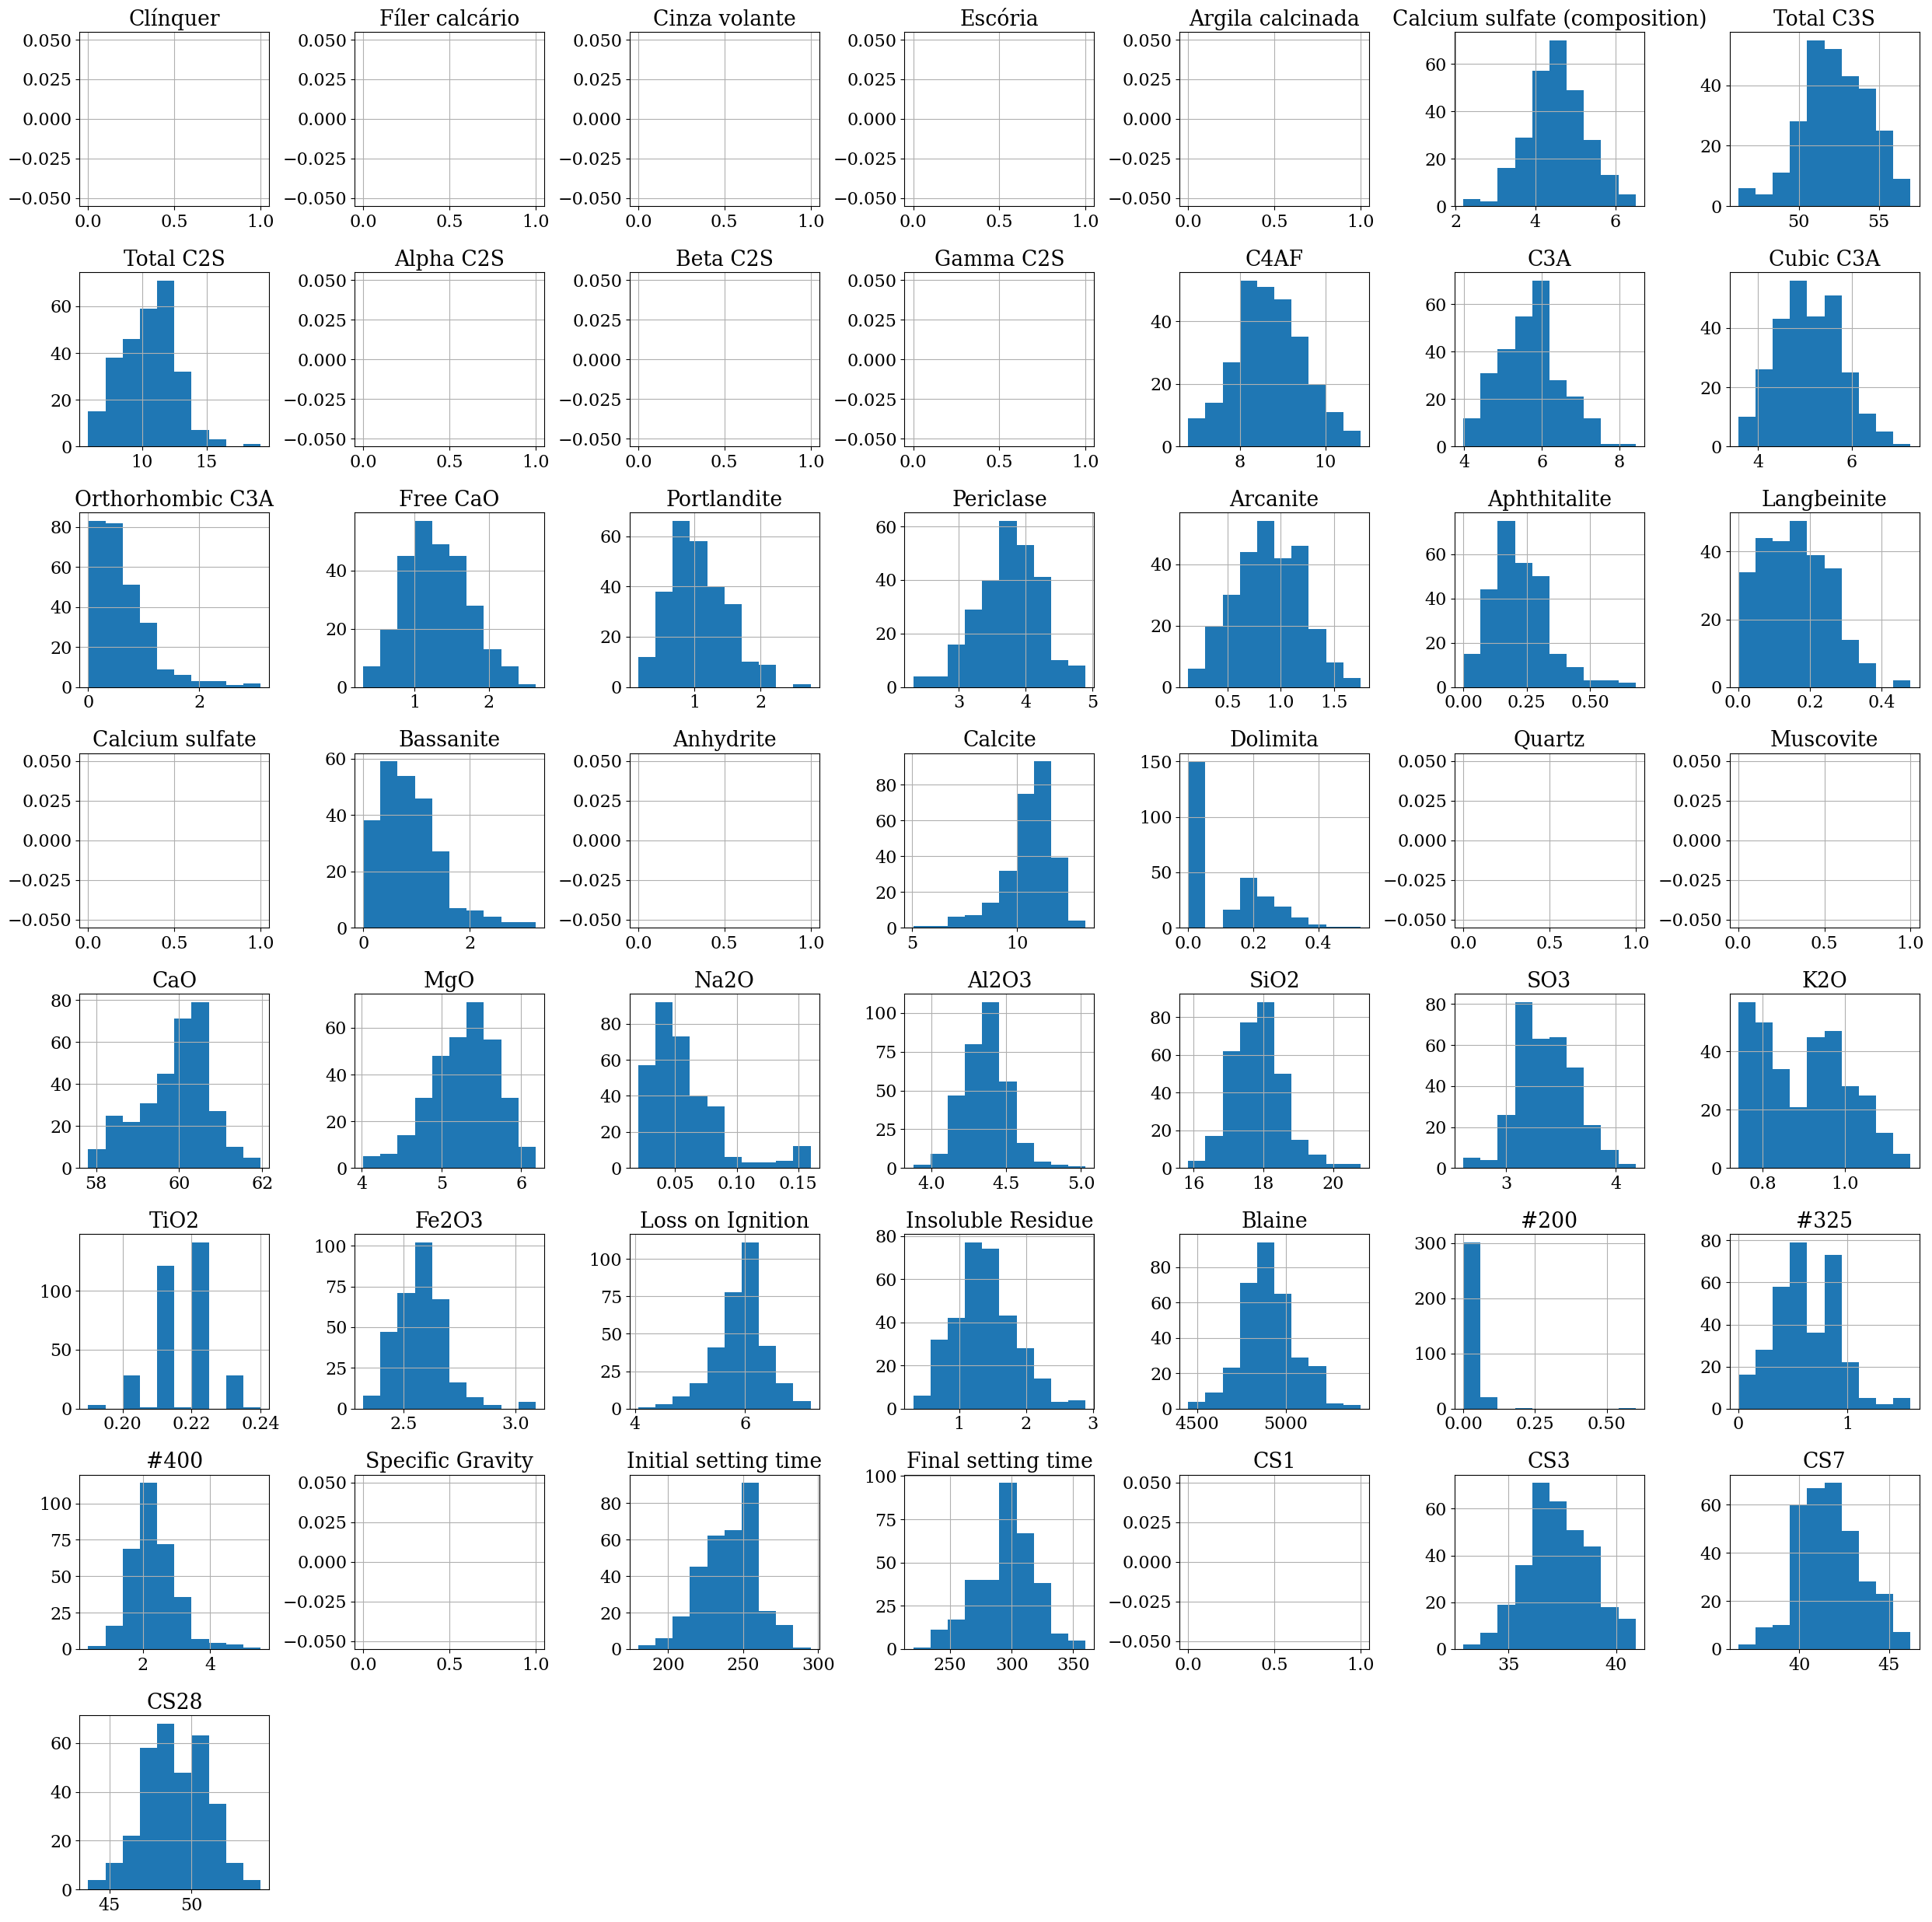

<IPython.core.display.Javascript object>

In [59]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

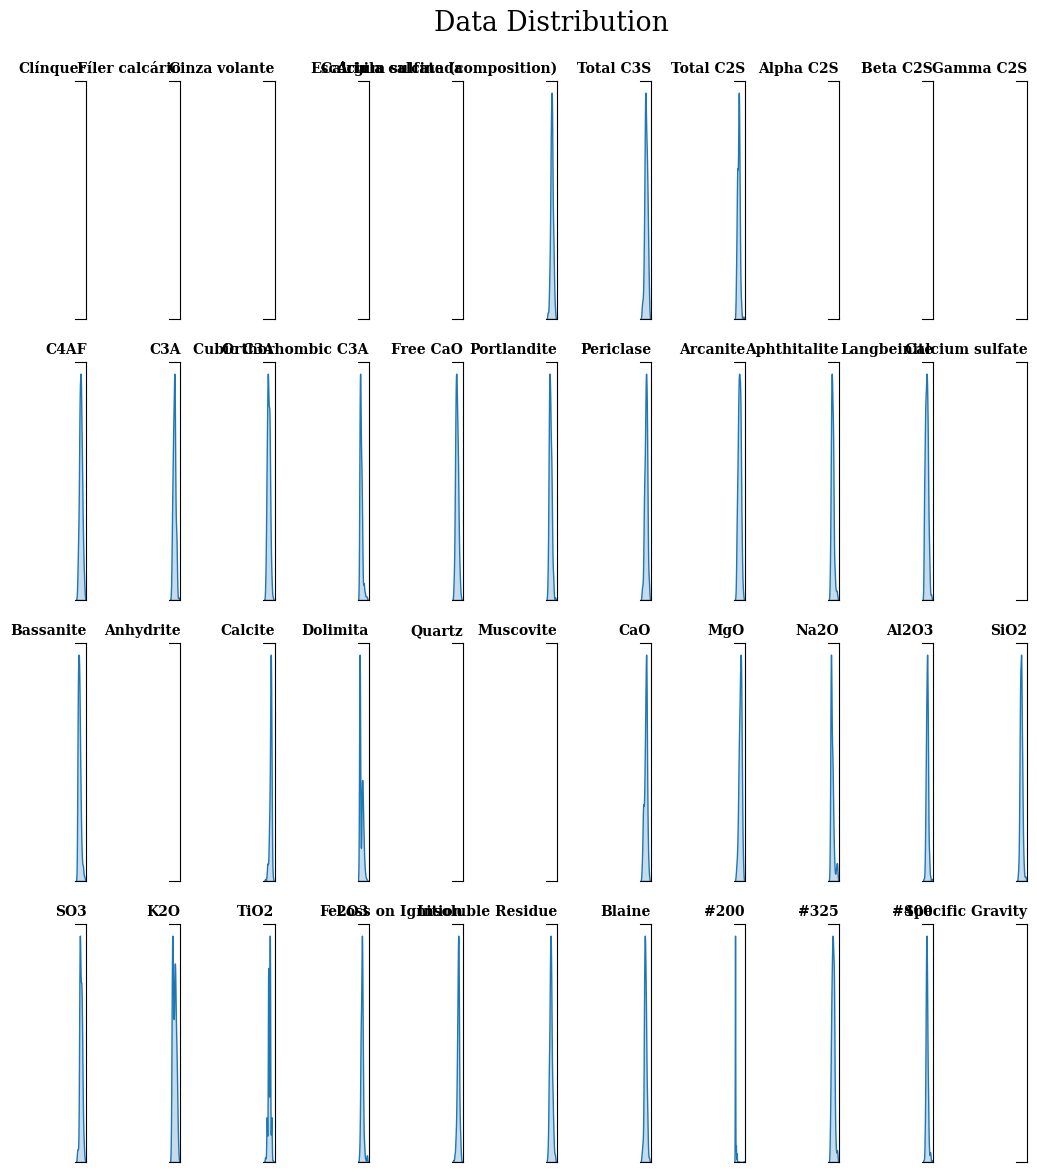

<IPython.core.display.Javascript object>

In [60]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 11, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").select_dtypes(exclude=object).columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

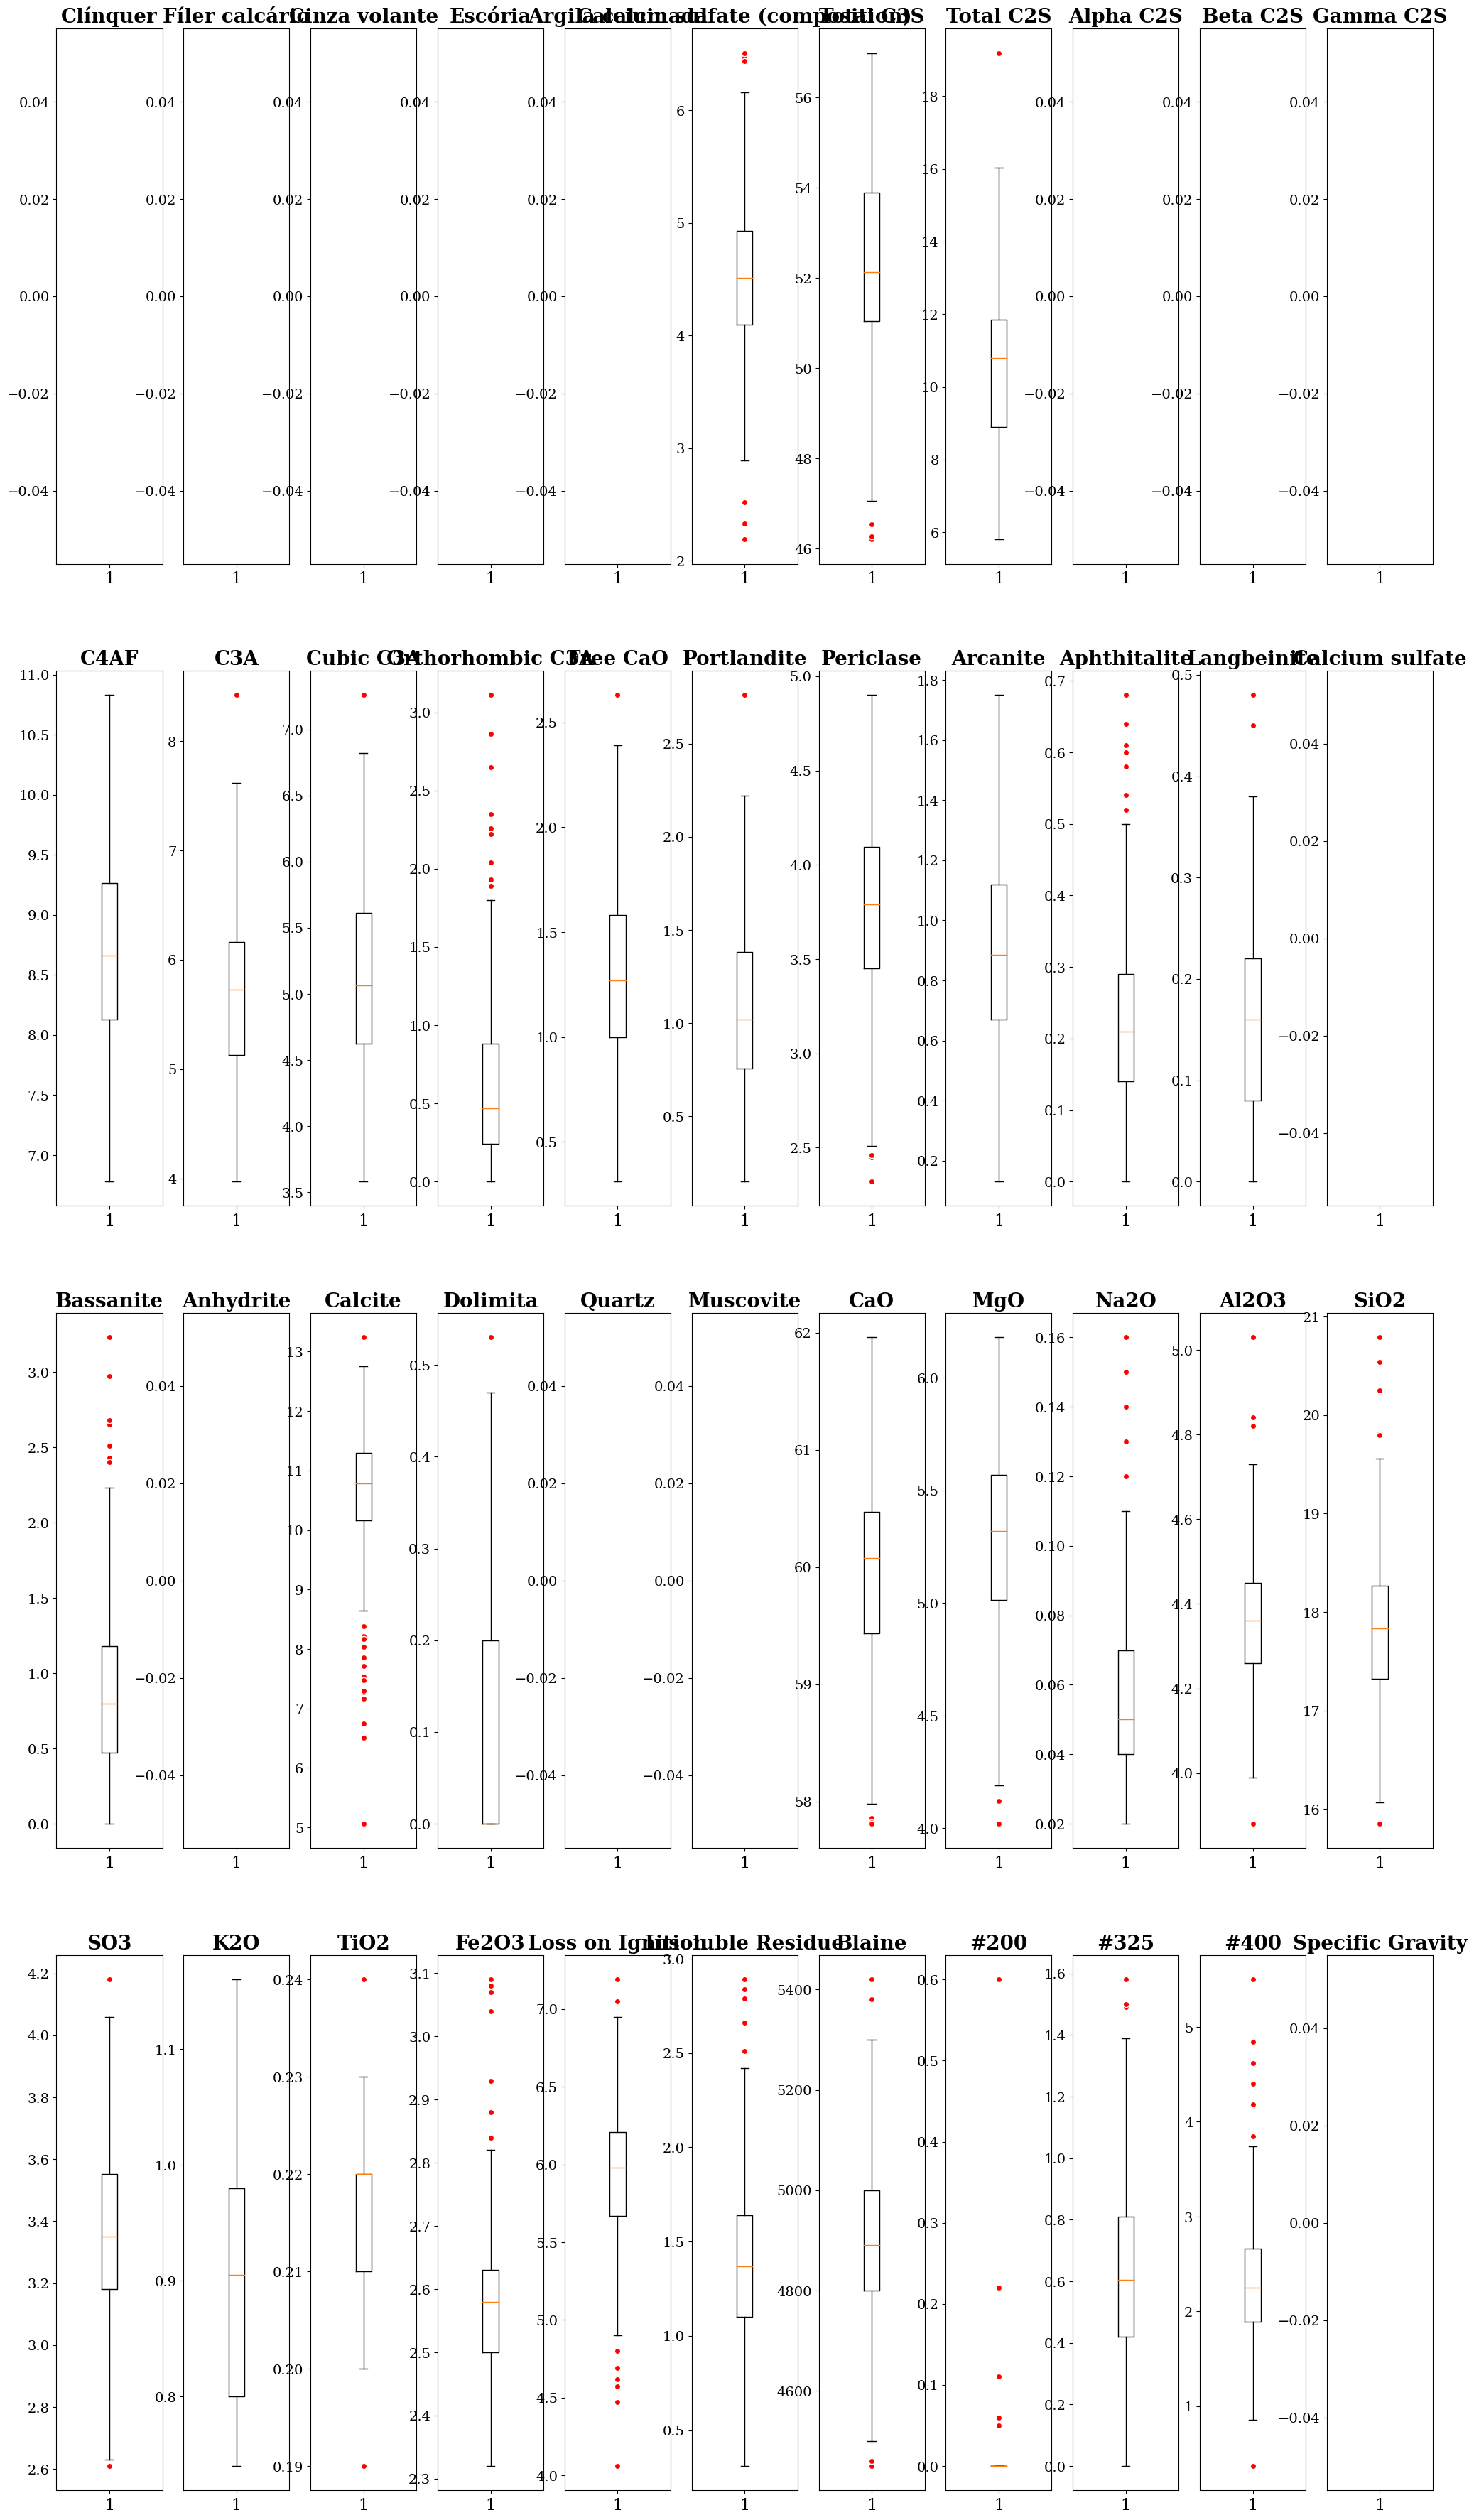

<IPython.core.display.Javascript object>

In [61]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(4, 11, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

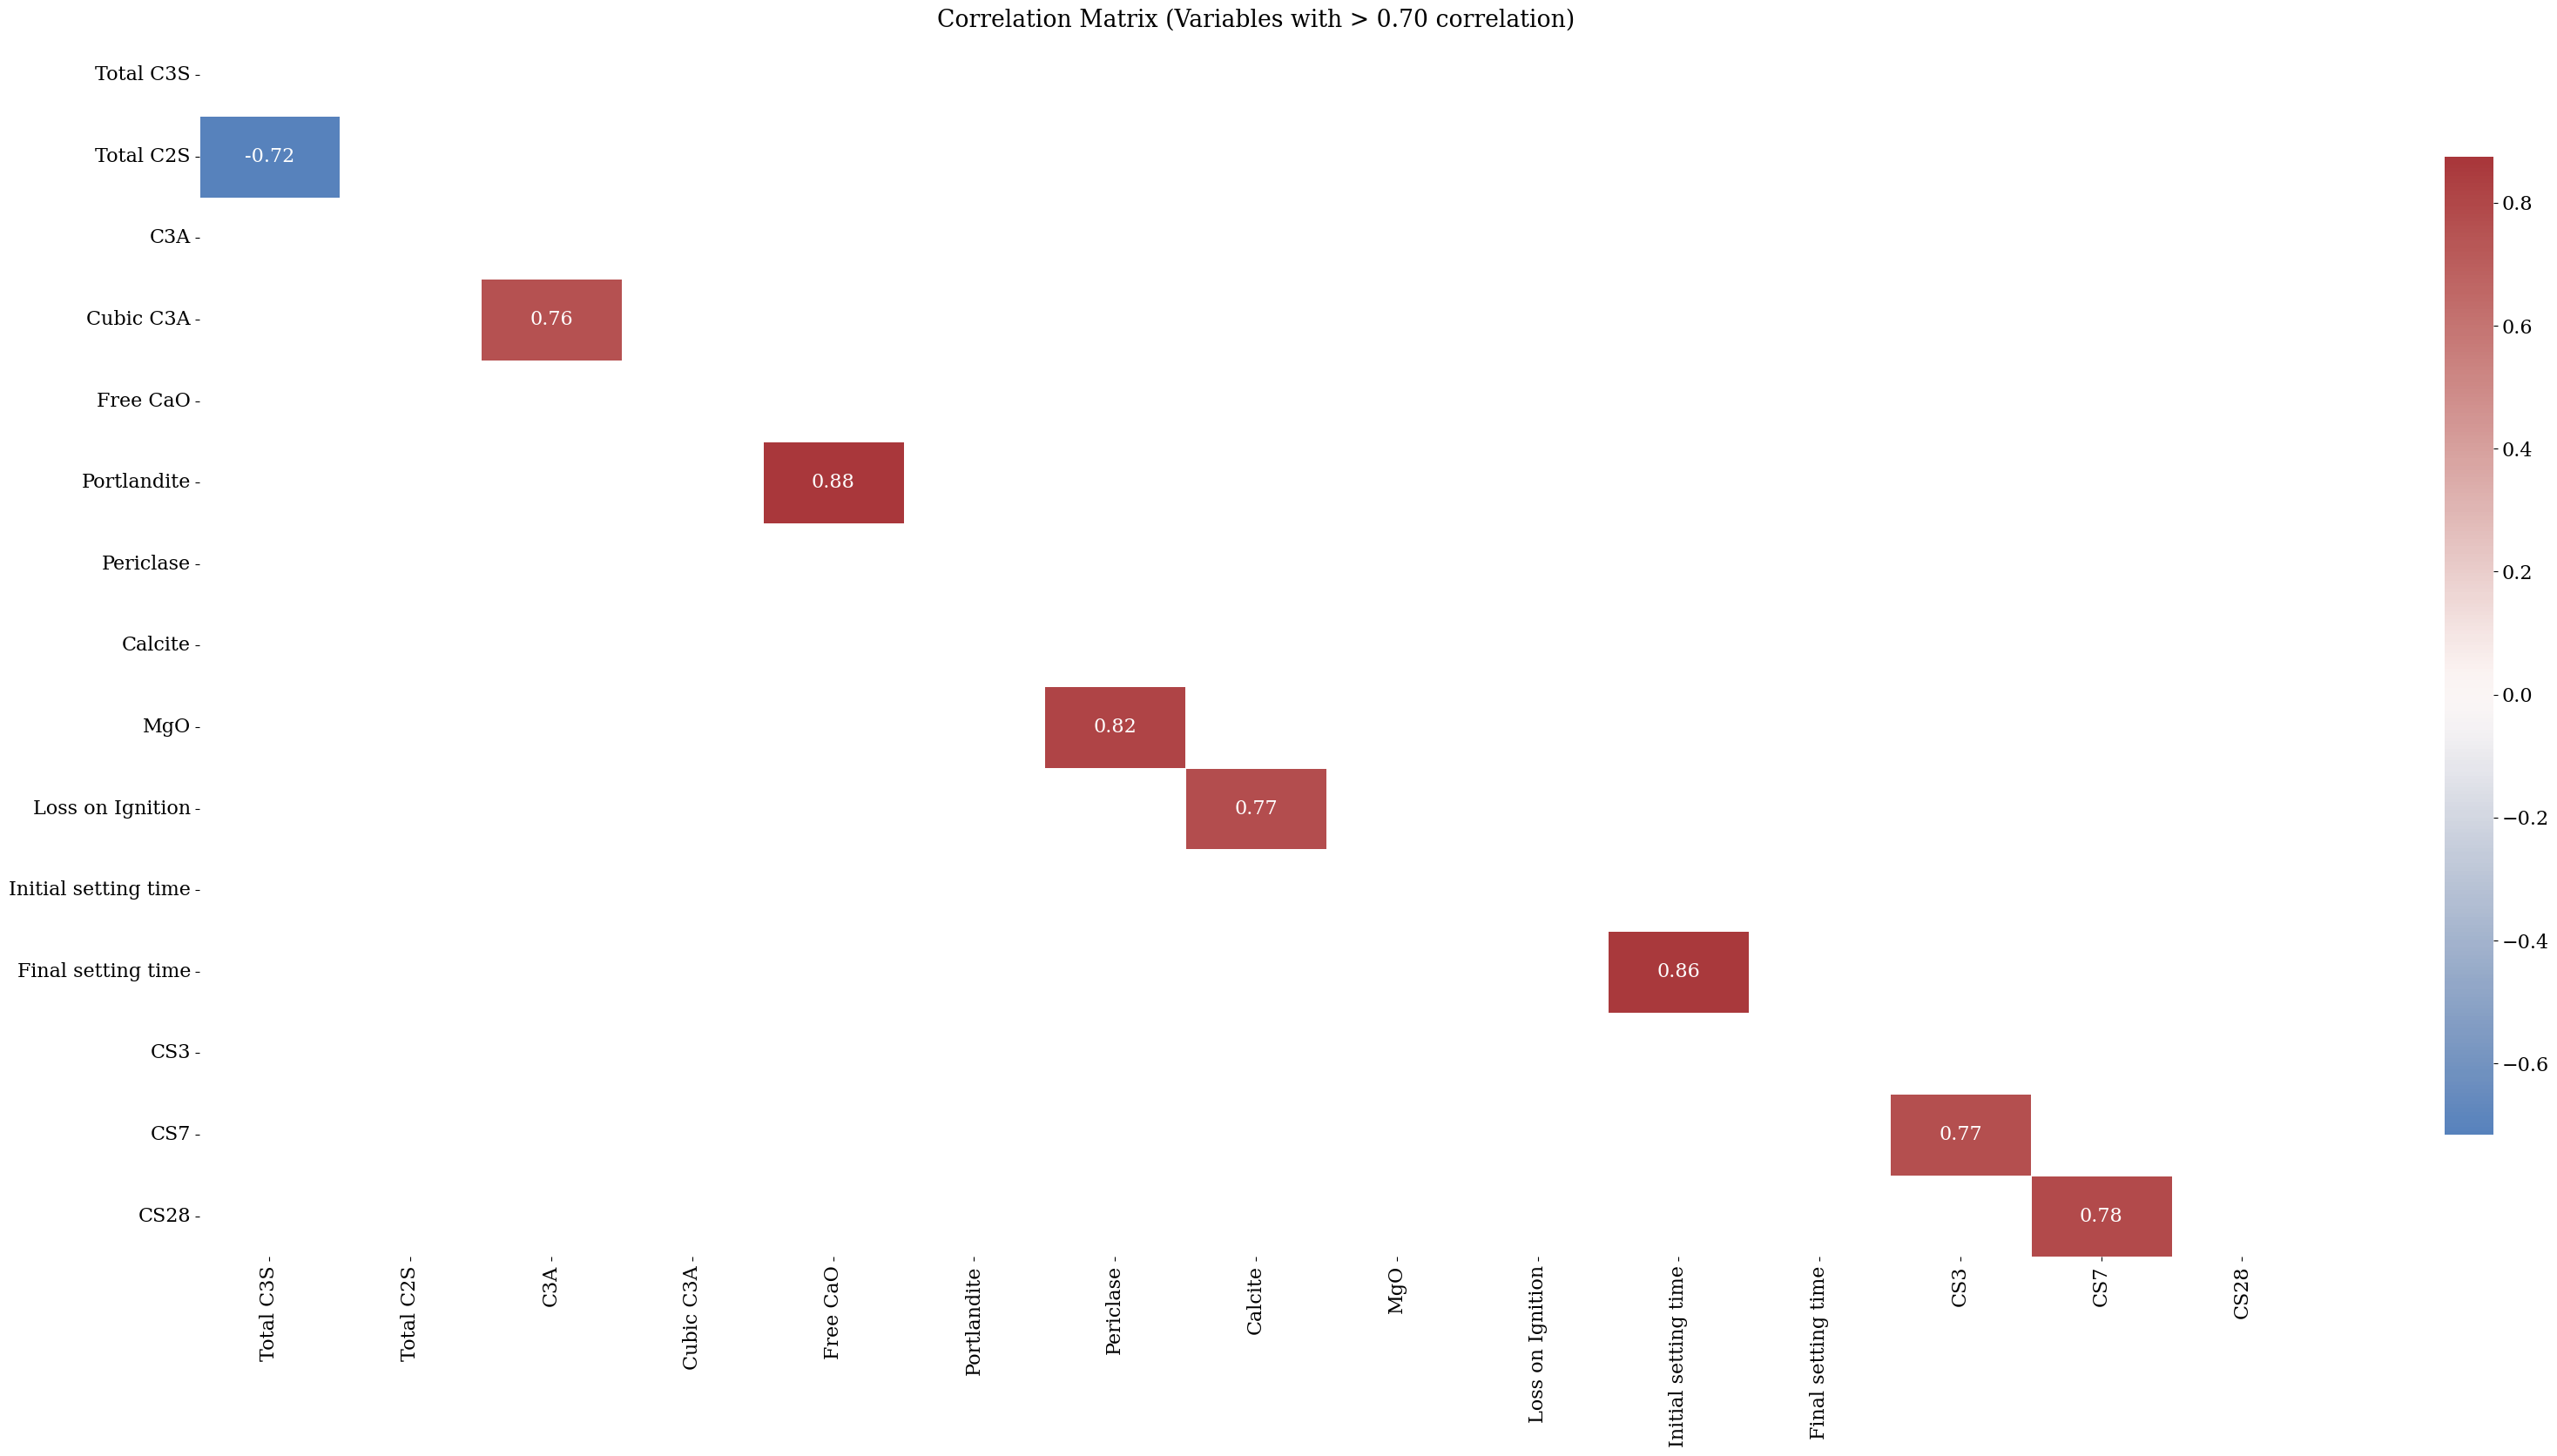

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Free CaO              Portlandite           0.875107
Initial setting time  Final setting time    0.860439
Periclase             MgO                   0.817498
CS7                   CS28                  0.784256
Calcite               Loss on Ignition      0.769483
CS3                   CS7                   0.767662
C3A                   Cubic C3A             0.759093
Total C3S             Total C2S             0.715572
dtype: float64

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.784256
CS3                            CS28    0.662446
Free CaO                       CS28    0.534546
Total C3S                      CS28    0.493704
Portlandite                    CS28    0.455241
SiO2                           CS28    0.444753
Loss on Ignition               CS28    0.403534
Na2O                           CS28    0.378203
Orthorhombic C3A               CS28    0.339381
Aphthitalite                   CS28    0.306818
Bassanite                      CS28    0.272205
Calcite                        CS28    0.262234
Dolimita                       CS28    0.236960
C3A                            CS28    0.233672
K2O                            CS28    0.230522
Al2O3                          CS28    0.219933
Fe2O3                          CS28    0.208682
CaO                            CS28    0.188449
Blaine                         CS28    0.166539
#325                           CS28    0.165538
Langbeinite                    CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

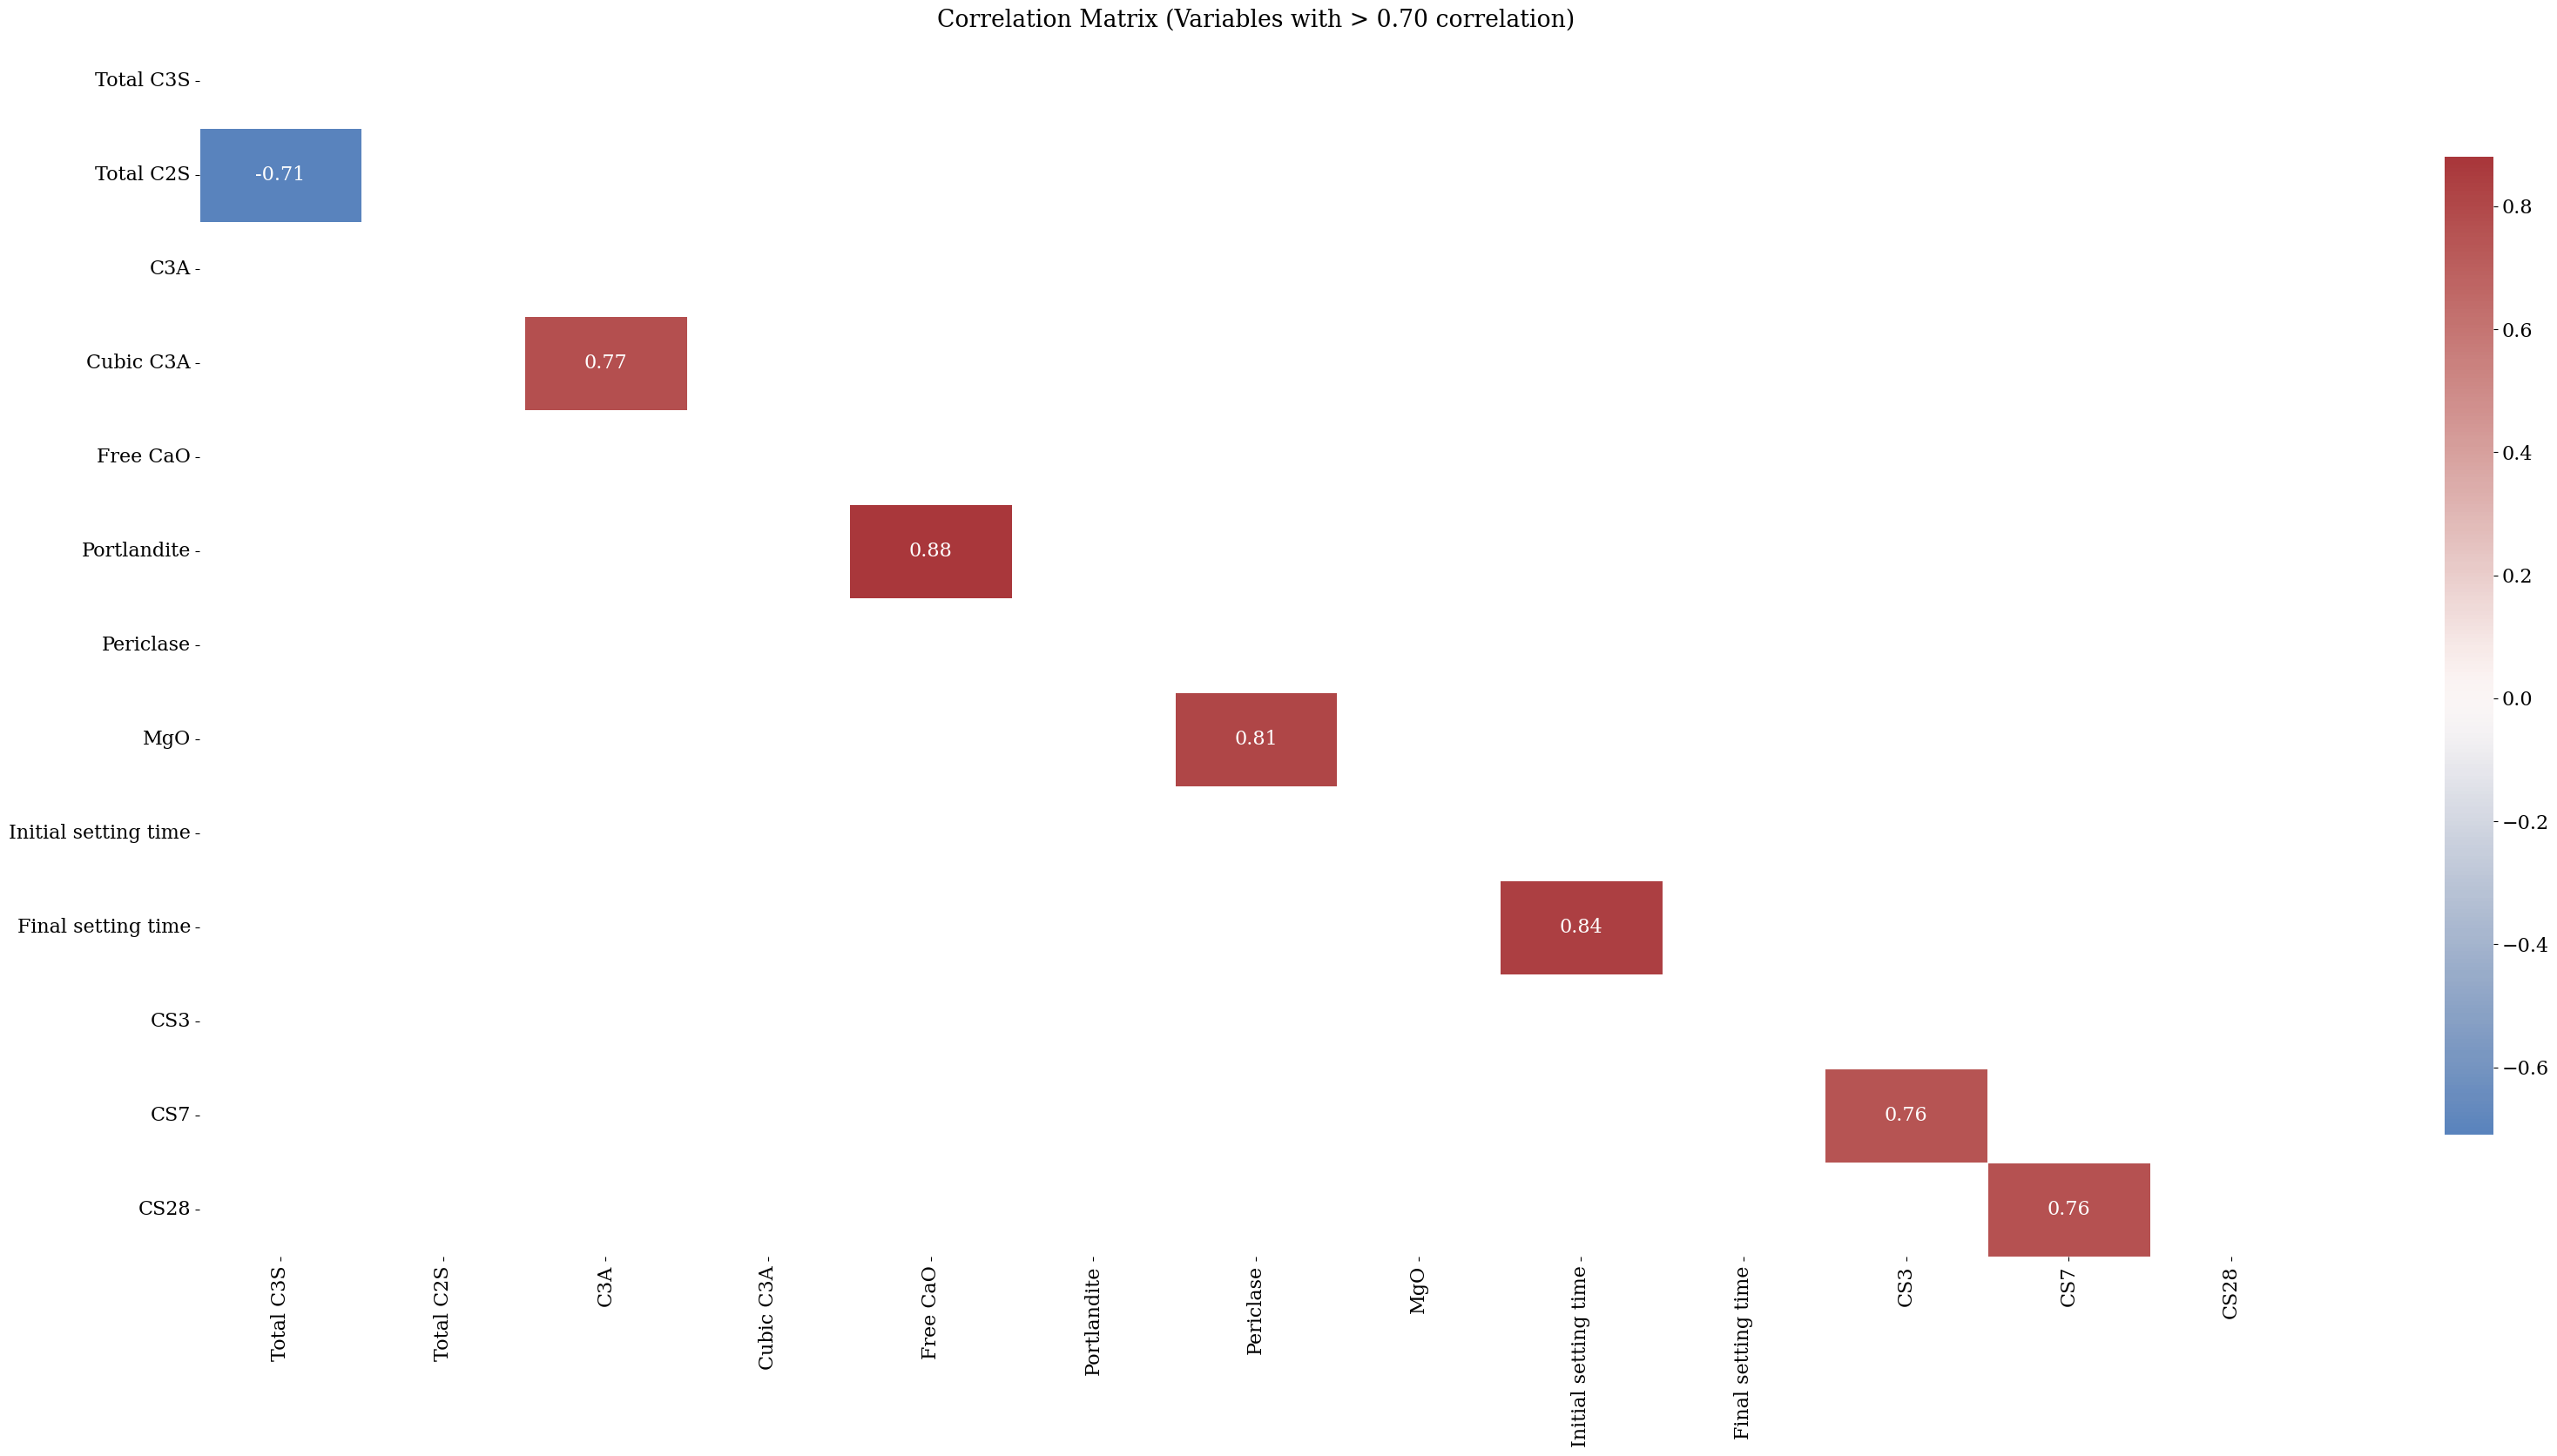

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Free CaO              Portlandite           0.880930
Initial setting time  Final setting time    0.842415
Periclase             MgO                   0.807120
C3A                   Cubic C3A             0.774592
CS7                   CS28                  0.763135
CS3                   CS7                   0.755116
Total C3S             Total C2S             0.709679
dtype: float64

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.763135
CS3                            CS28    0.643594
Free CaO                       CS28    0.516641
SiO2                           CS28    0.470650
Total C3S                      CS28    0.459971
Portlandite                    CS28    0.446819
Loss on Ignition               CS28    0.408899
Orthorhombic C3A               CS28    0.329695
Na2O                           CS28    0.286545
Bassanite                      CS28    0.264302
Aphthitalite                   CS28    0.250151
Calcite                        CS28    0.225692
K2O                            CS28    0.224734
C3A                            CS28    0.224379
Fe2O3                          CS28    0.211490
Al2O3                          CS28    0.209957
Dolimita                       CS28    0.209099
Blaine                         CS28    0.185225
Langbeinite                    CS28    0.179333
C4AF                           CS28    0.169421
#325                           CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

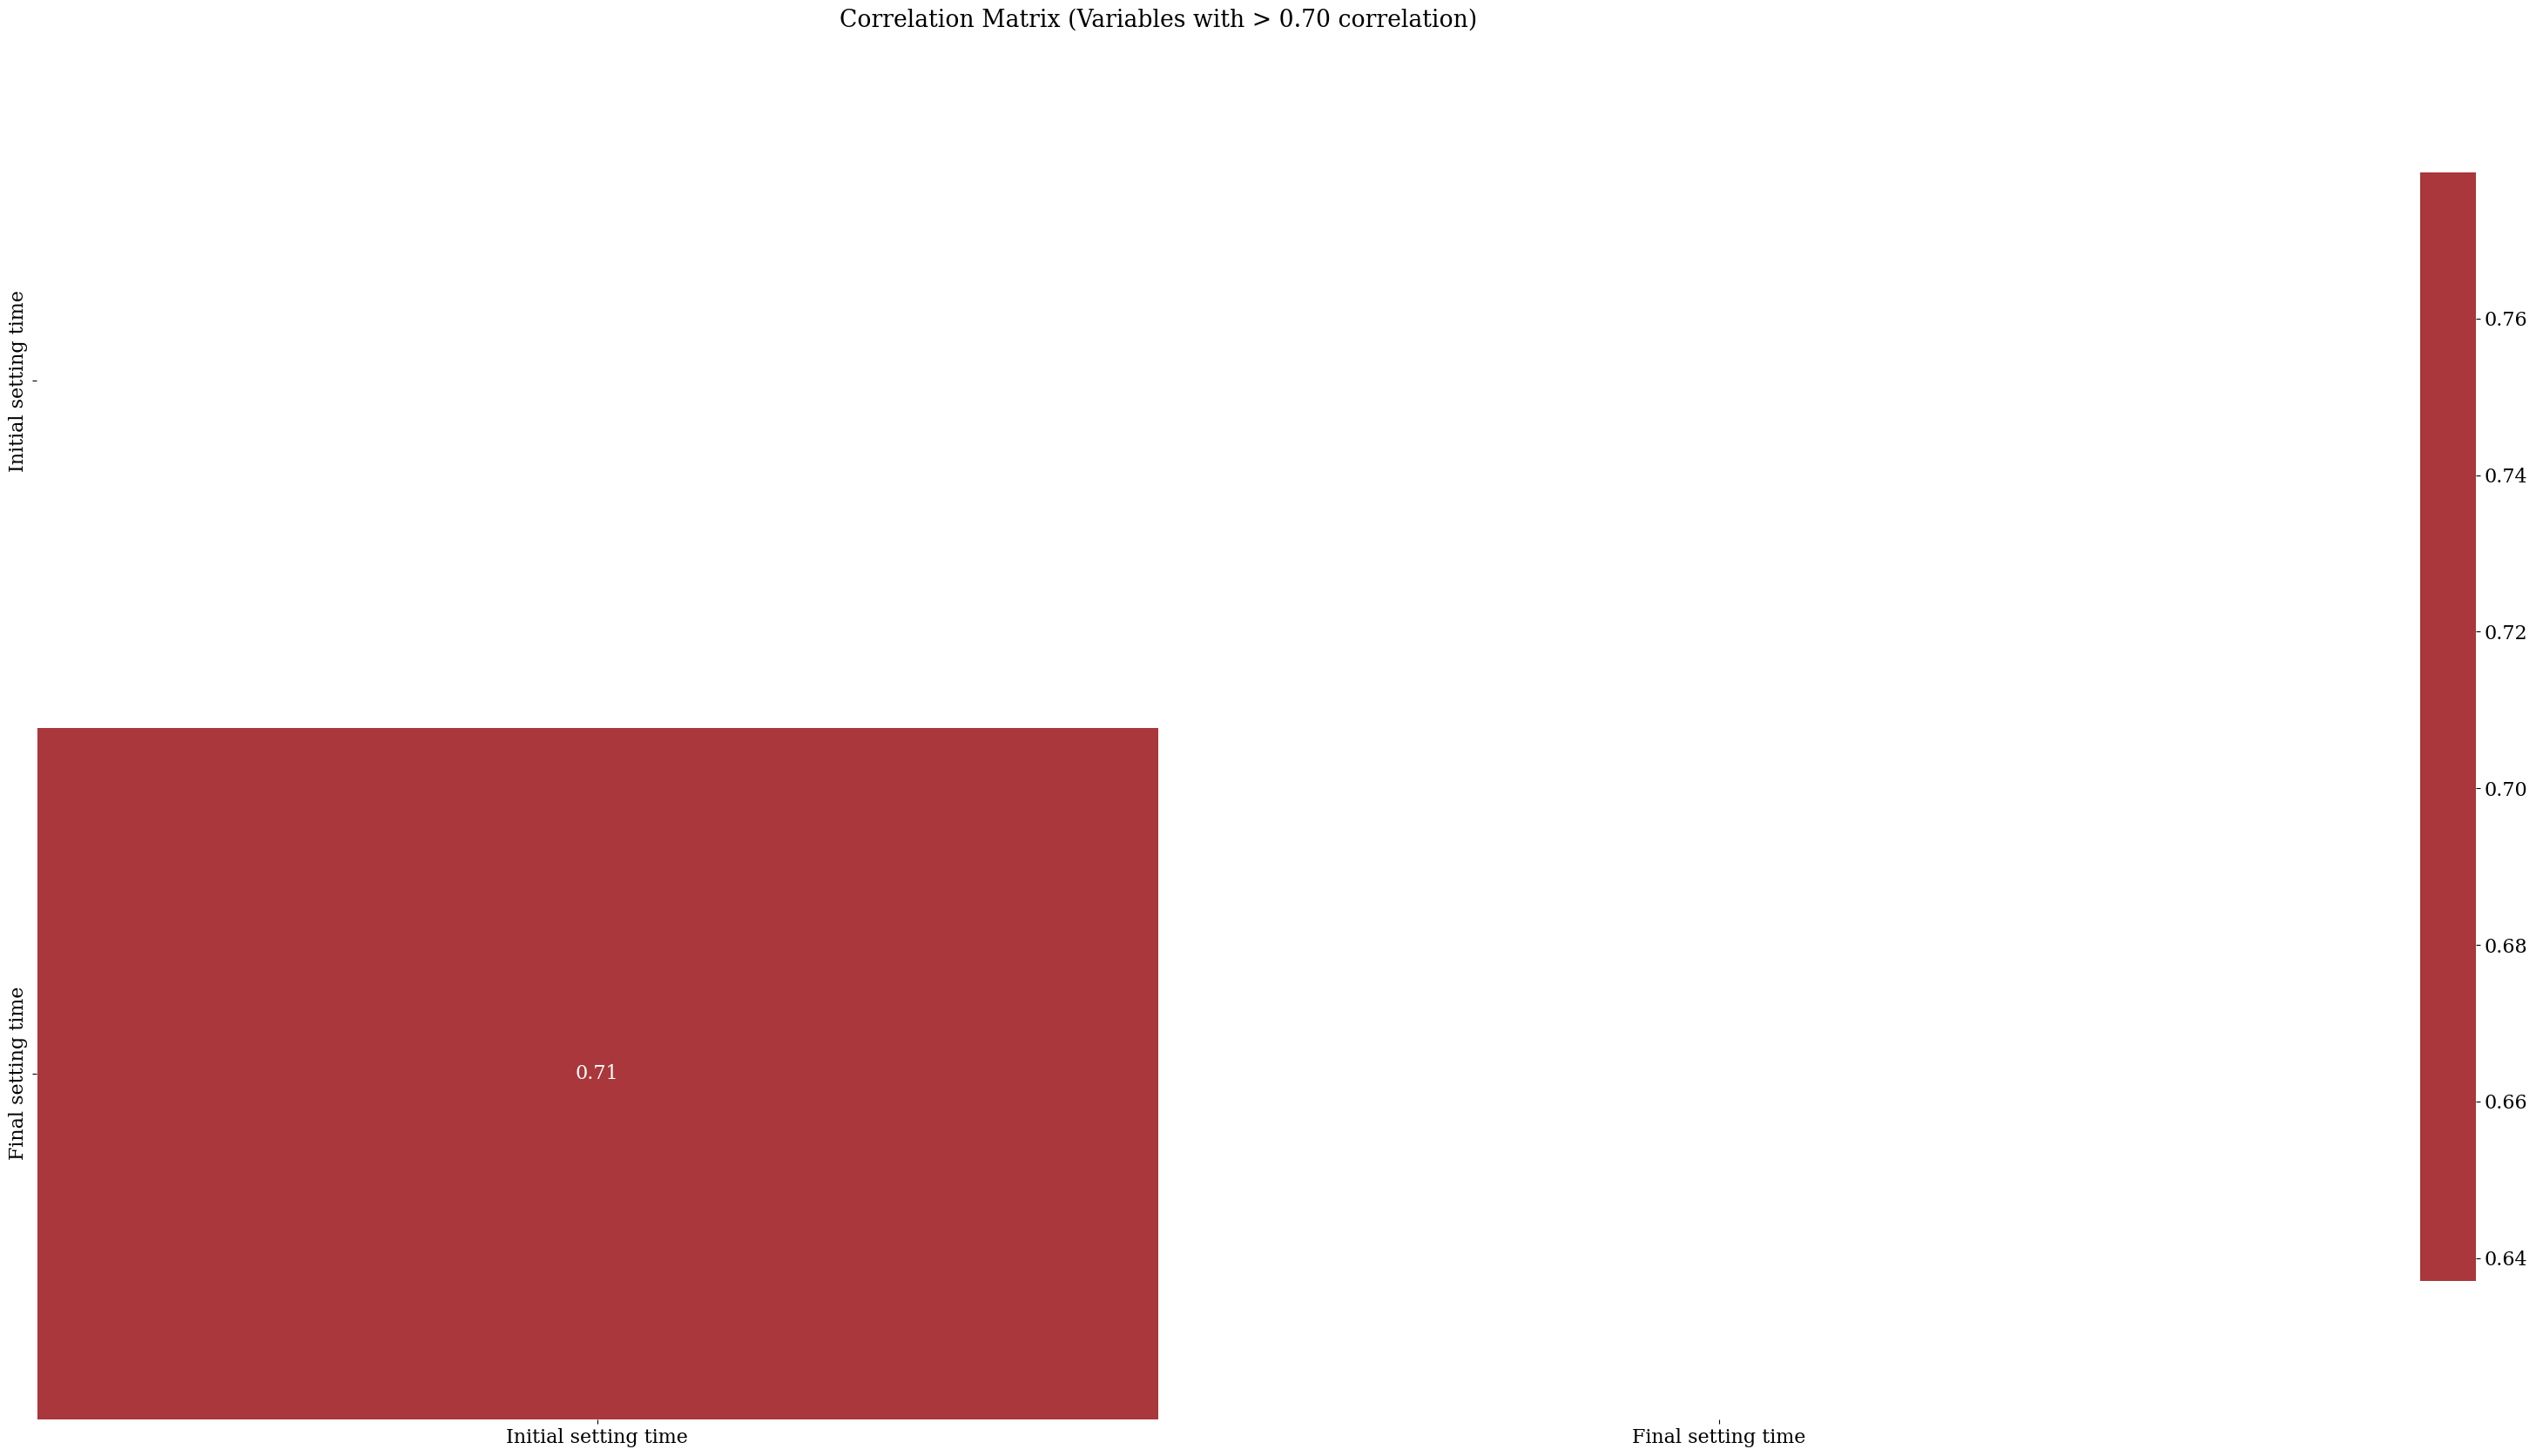

<IPython.core.display.Javascript object>

In [68]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [69]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.707829
dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.583927
CS3                            CS28    0.478344
Free CaO                       CS28    0.366559
SiO2                           CS28    0.325705
Total C3S                      CS28    0.318373
Portlandite                    CS28    0.313336
Loss on Ignition               CS28    0.283583
Orthorhombic C3A               CS28    0.229443
Na2O                           CS28    0.204848
Bassanite                      CS28    0.175979
Aphthitalite                   CS28    0.174354
Dolimita                       CS28    0.156530
K2O                            CS28    0.153194
C3A                            CS28    0.152829
Al2O3                          CS28    0.150882
Calcite                        CS28    0.149667
Fe2O3                          CS28    0.143130
Langbeinite                    CS28    0.124915
Blaine                         CS28    0.121949
C4AF                           CS28    0.117663
#325                           CS28    0

<IPython.core.display.Javascript object>

#### Bivariate Analysis

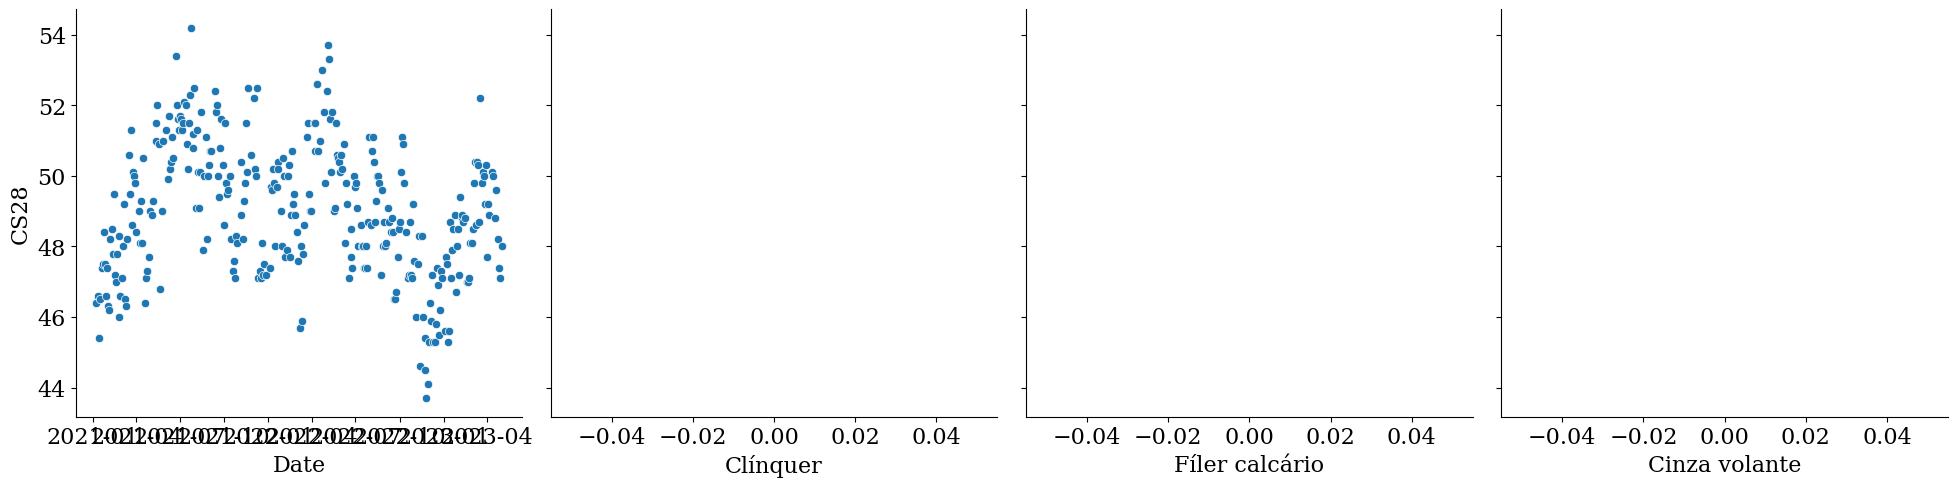

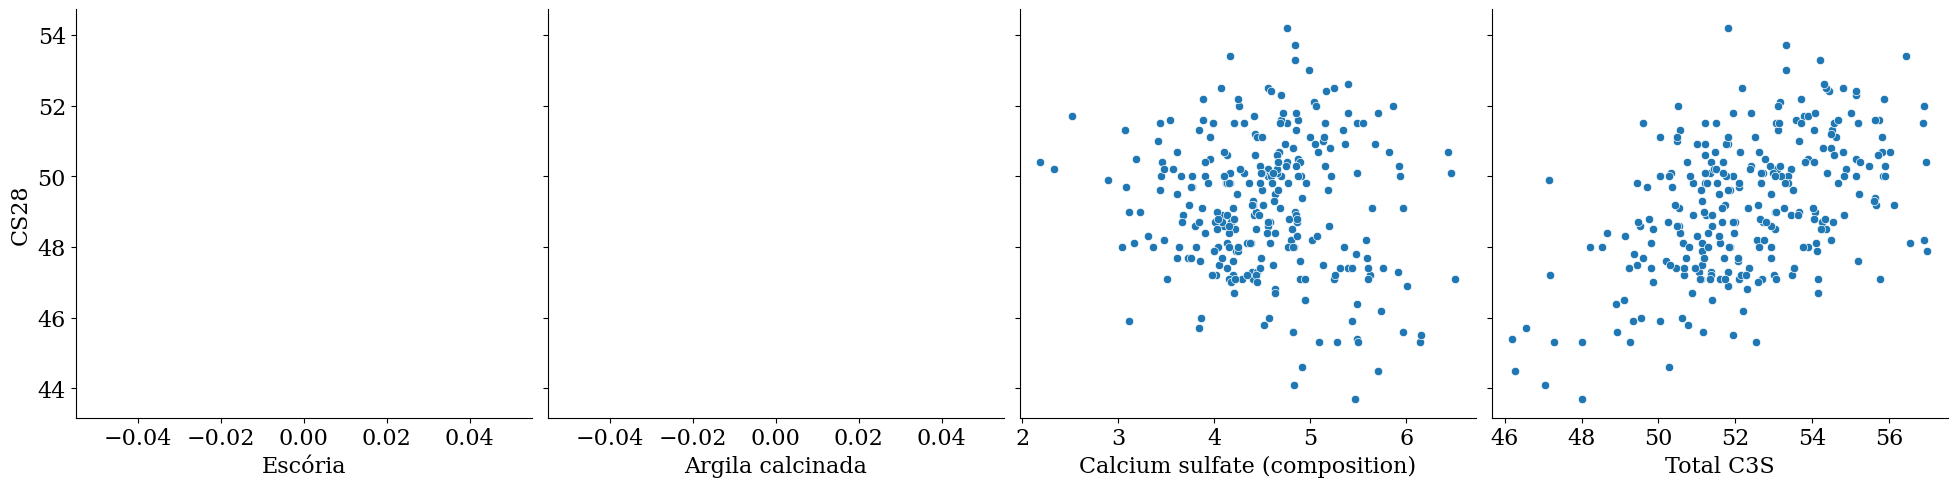

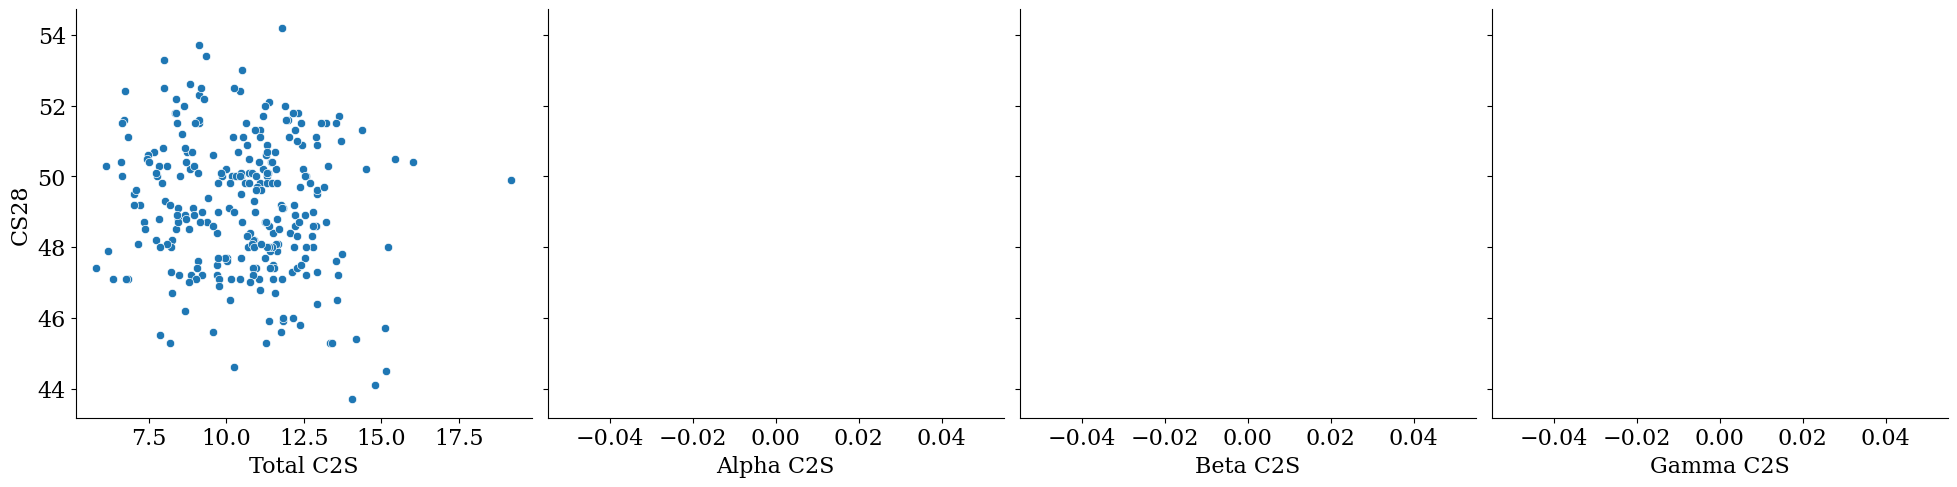

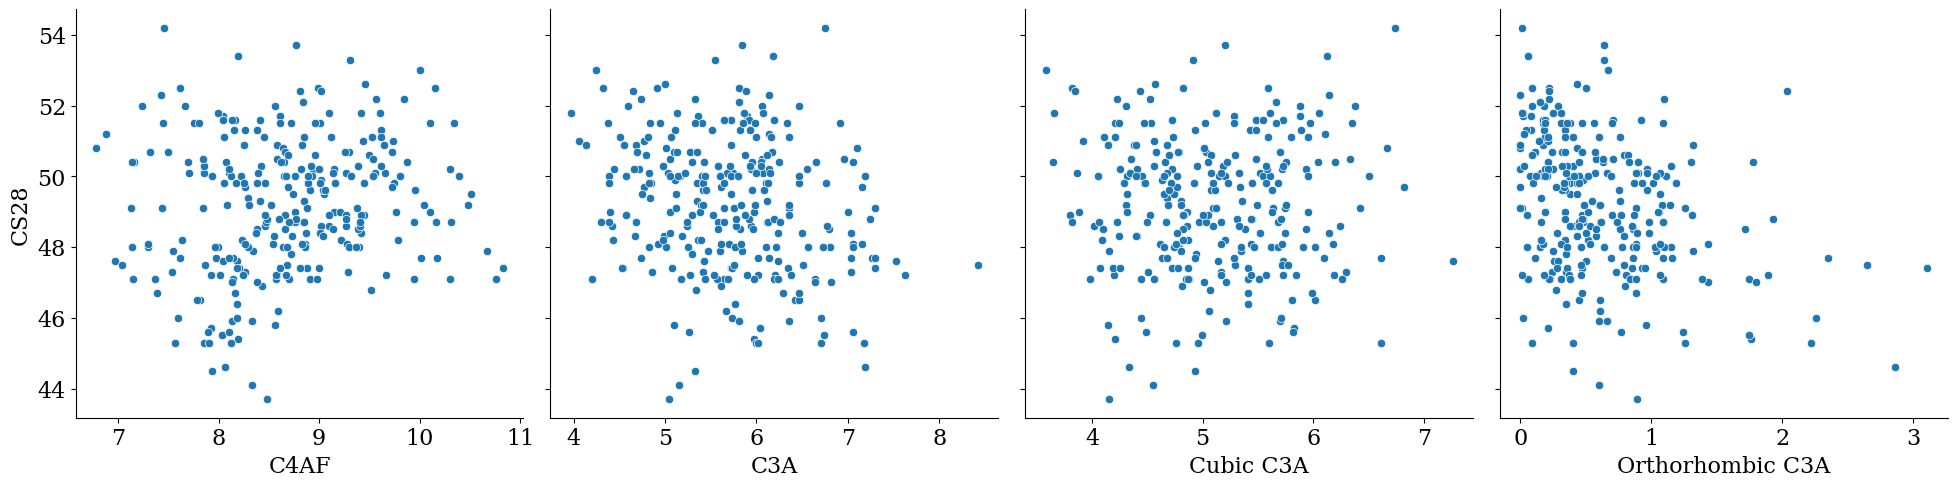

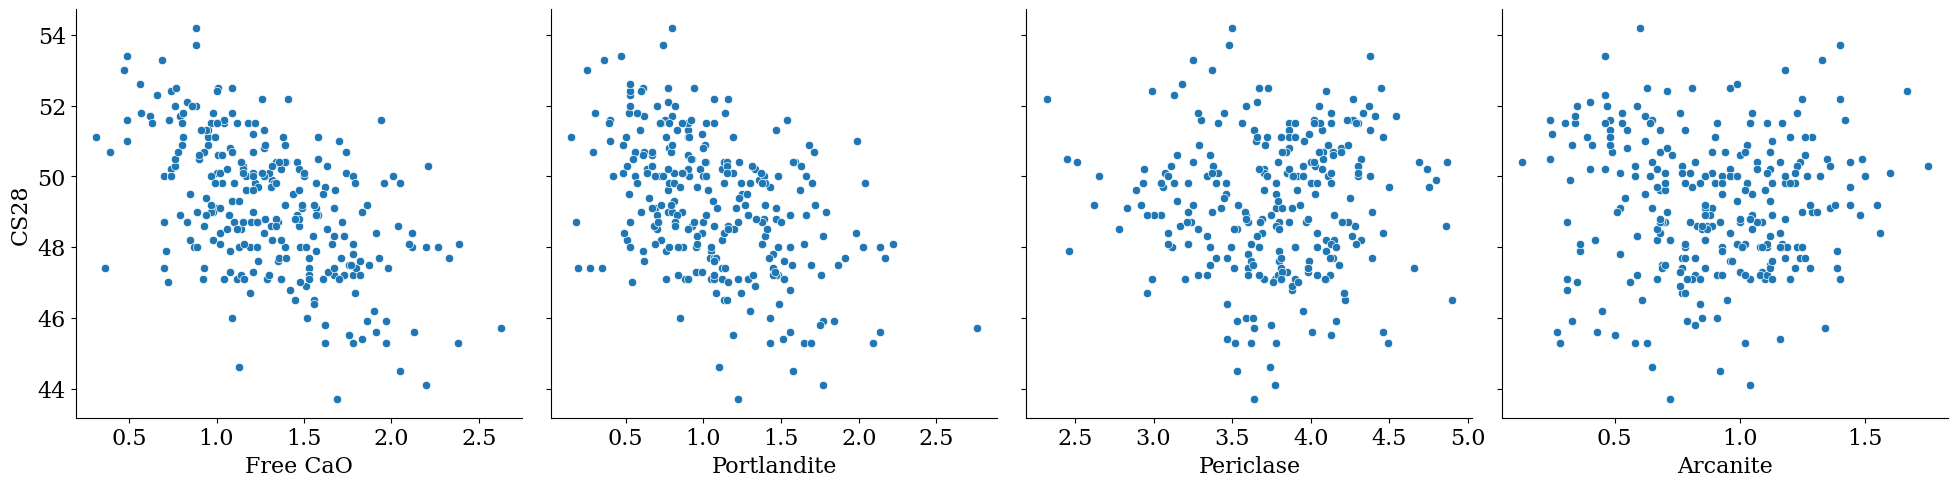

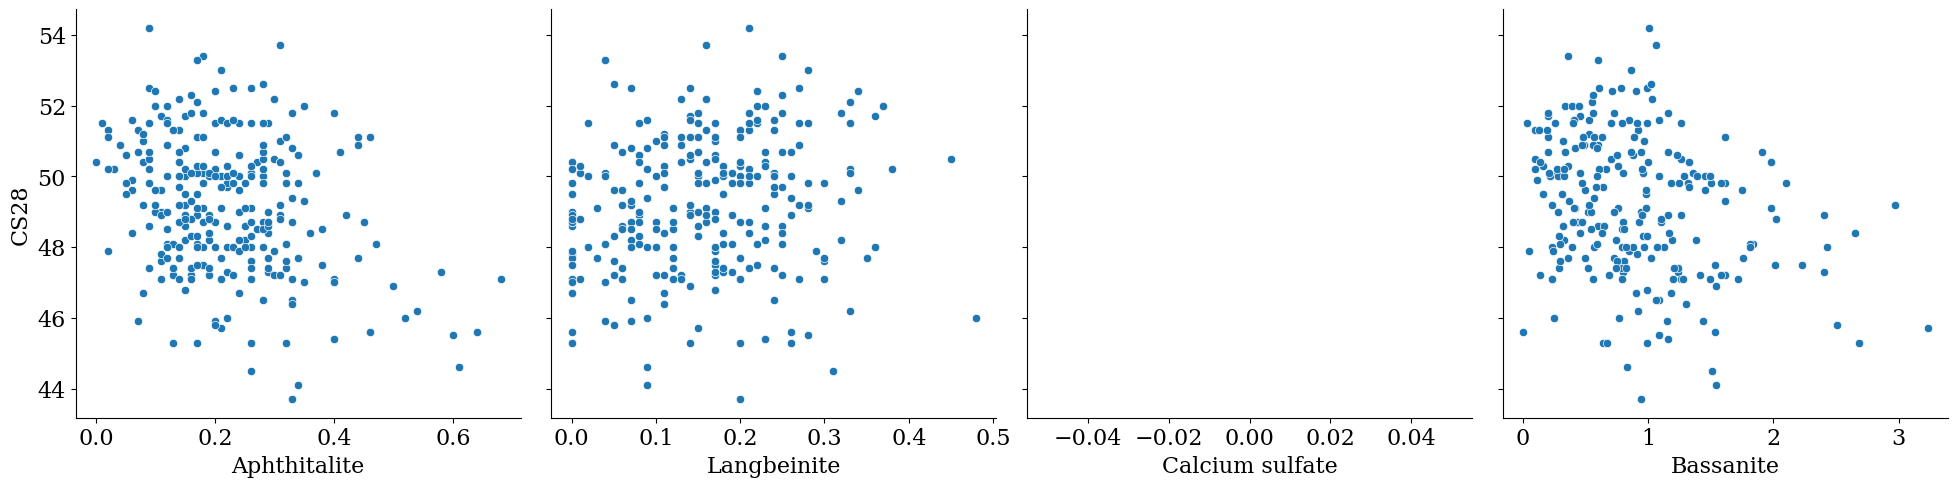

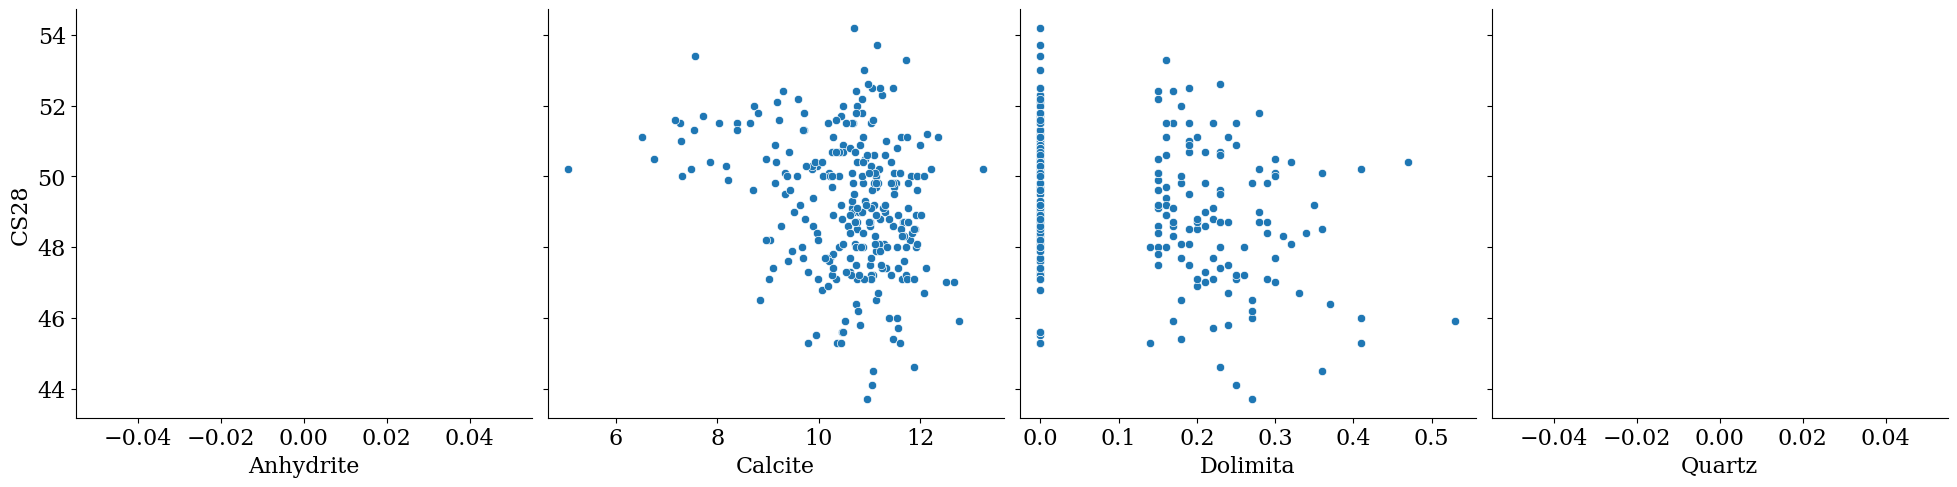

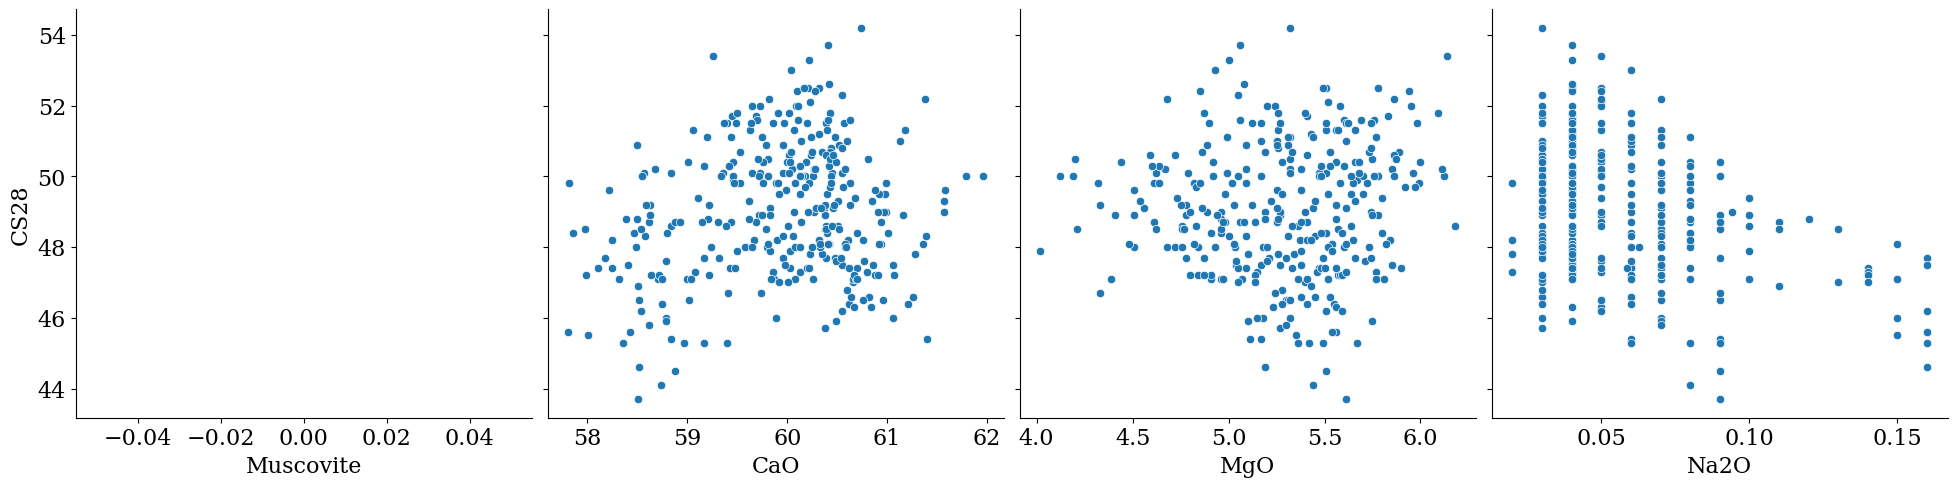

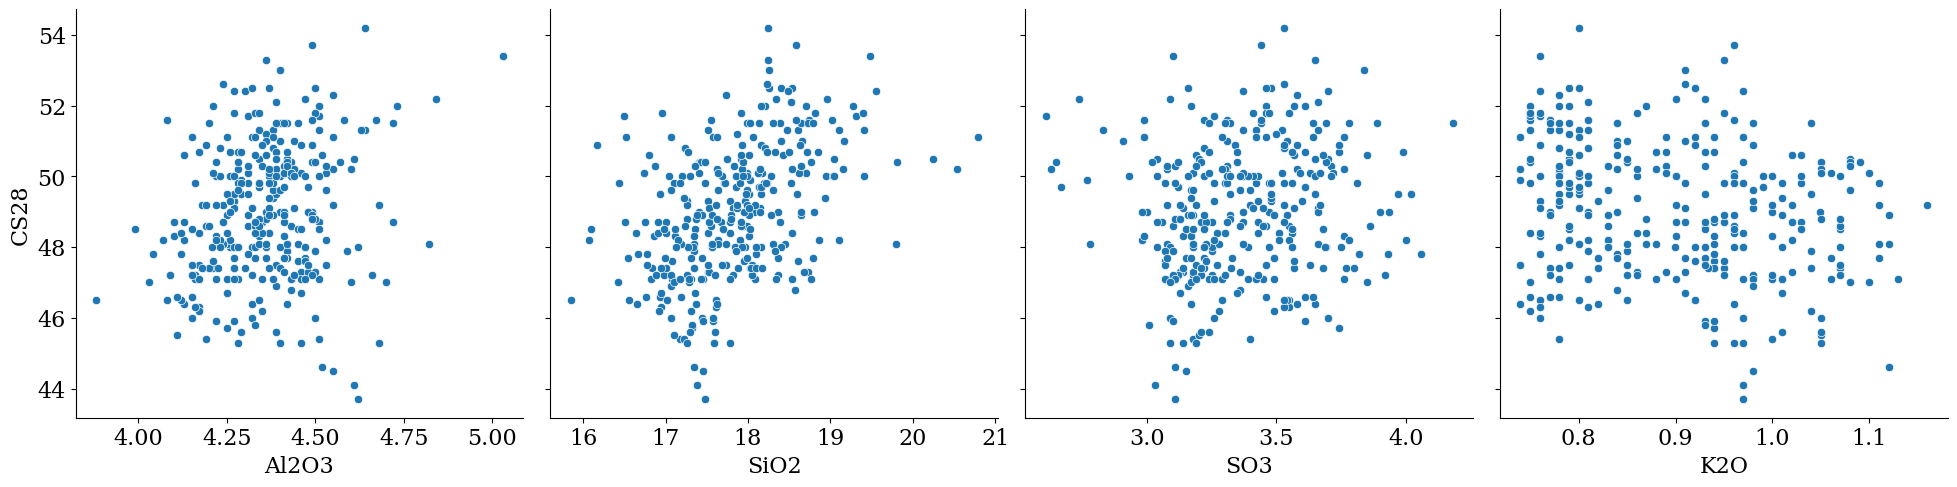

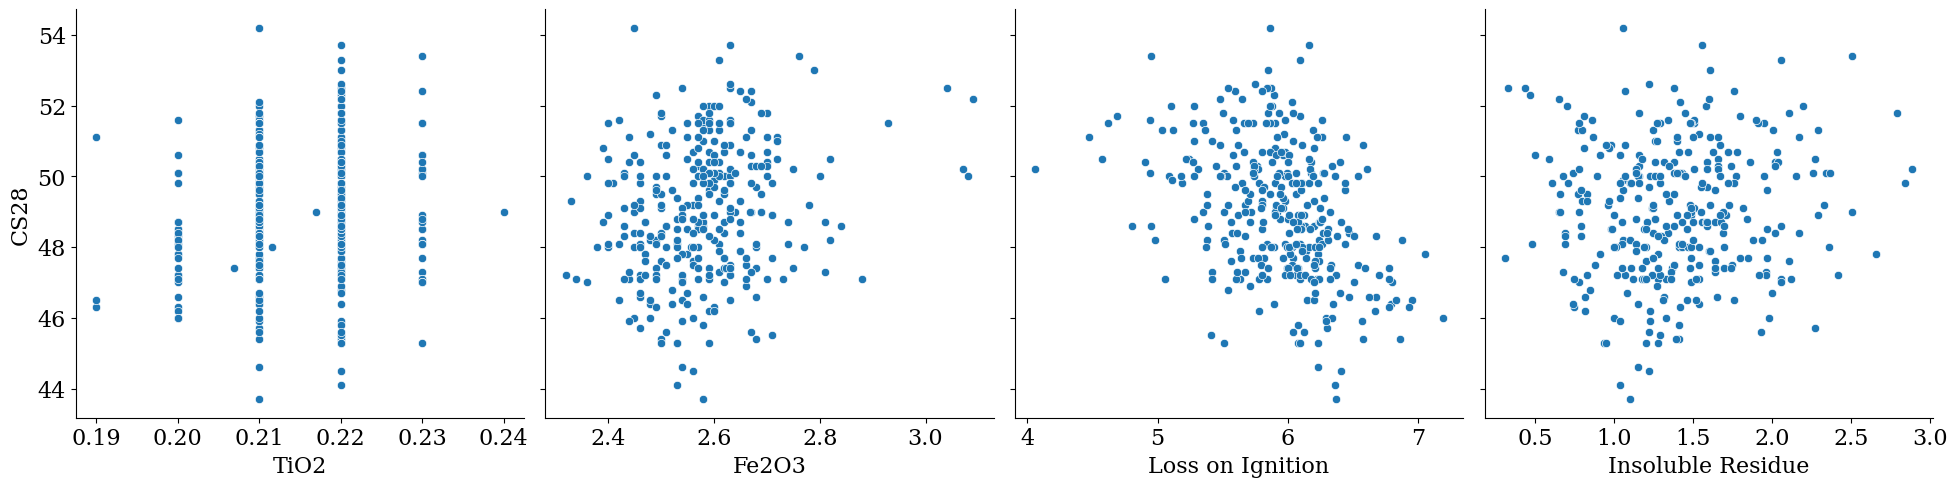

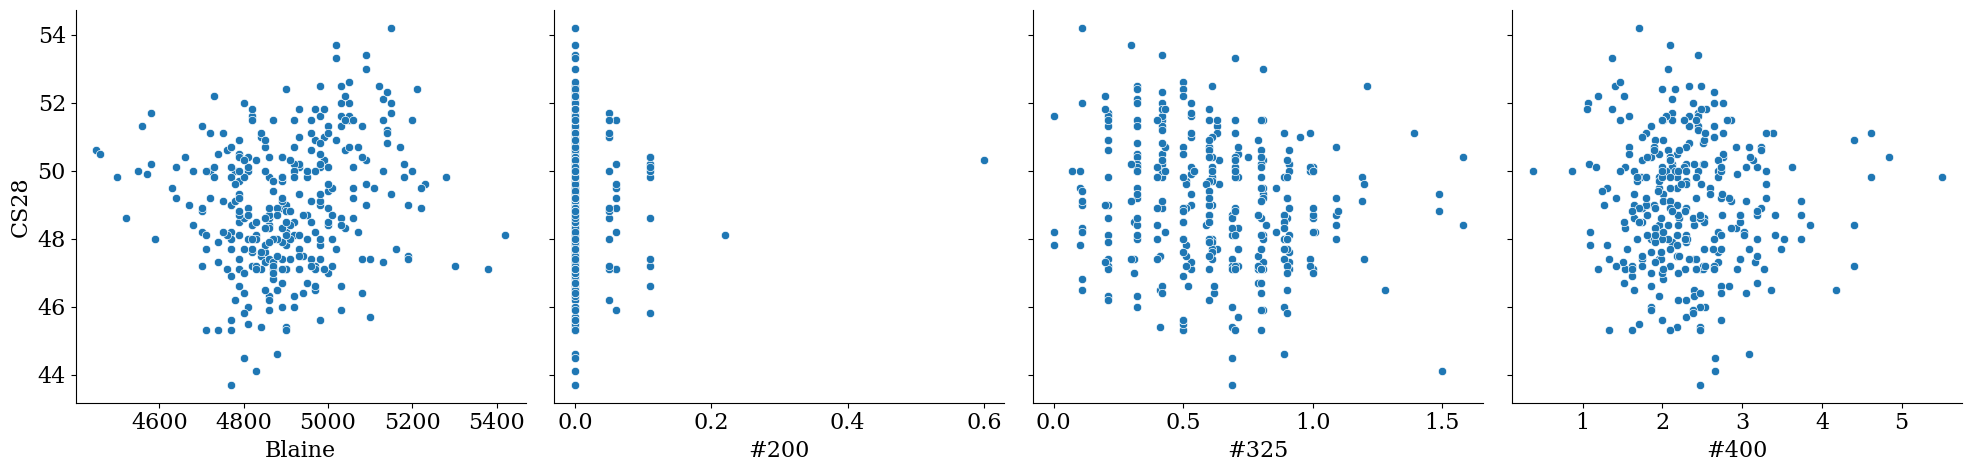

<IPython.core.display.Javascript object>

In [71]:
num_lines = 11
plots_per_line = 4

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [72]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

In [73]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

### 4. Date/TimeVariable Analyses

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

226 valid days out of 324


<IPython.core.display.Javascript object>

In [75]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        10
      2        12
      3        13
      4        11
      5         9
      6        11
      7        14
      8        12
      9        11
      10       11
      11        9
      12       11
2022  1        11
      2        12
      3        12
      4         9
      5        13
      6        12
      7        12
      8        13
      9        12
      10       12
      11       11
      12       13
2023  1        13
      2        11
      3        13
      4        10
      5         1
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

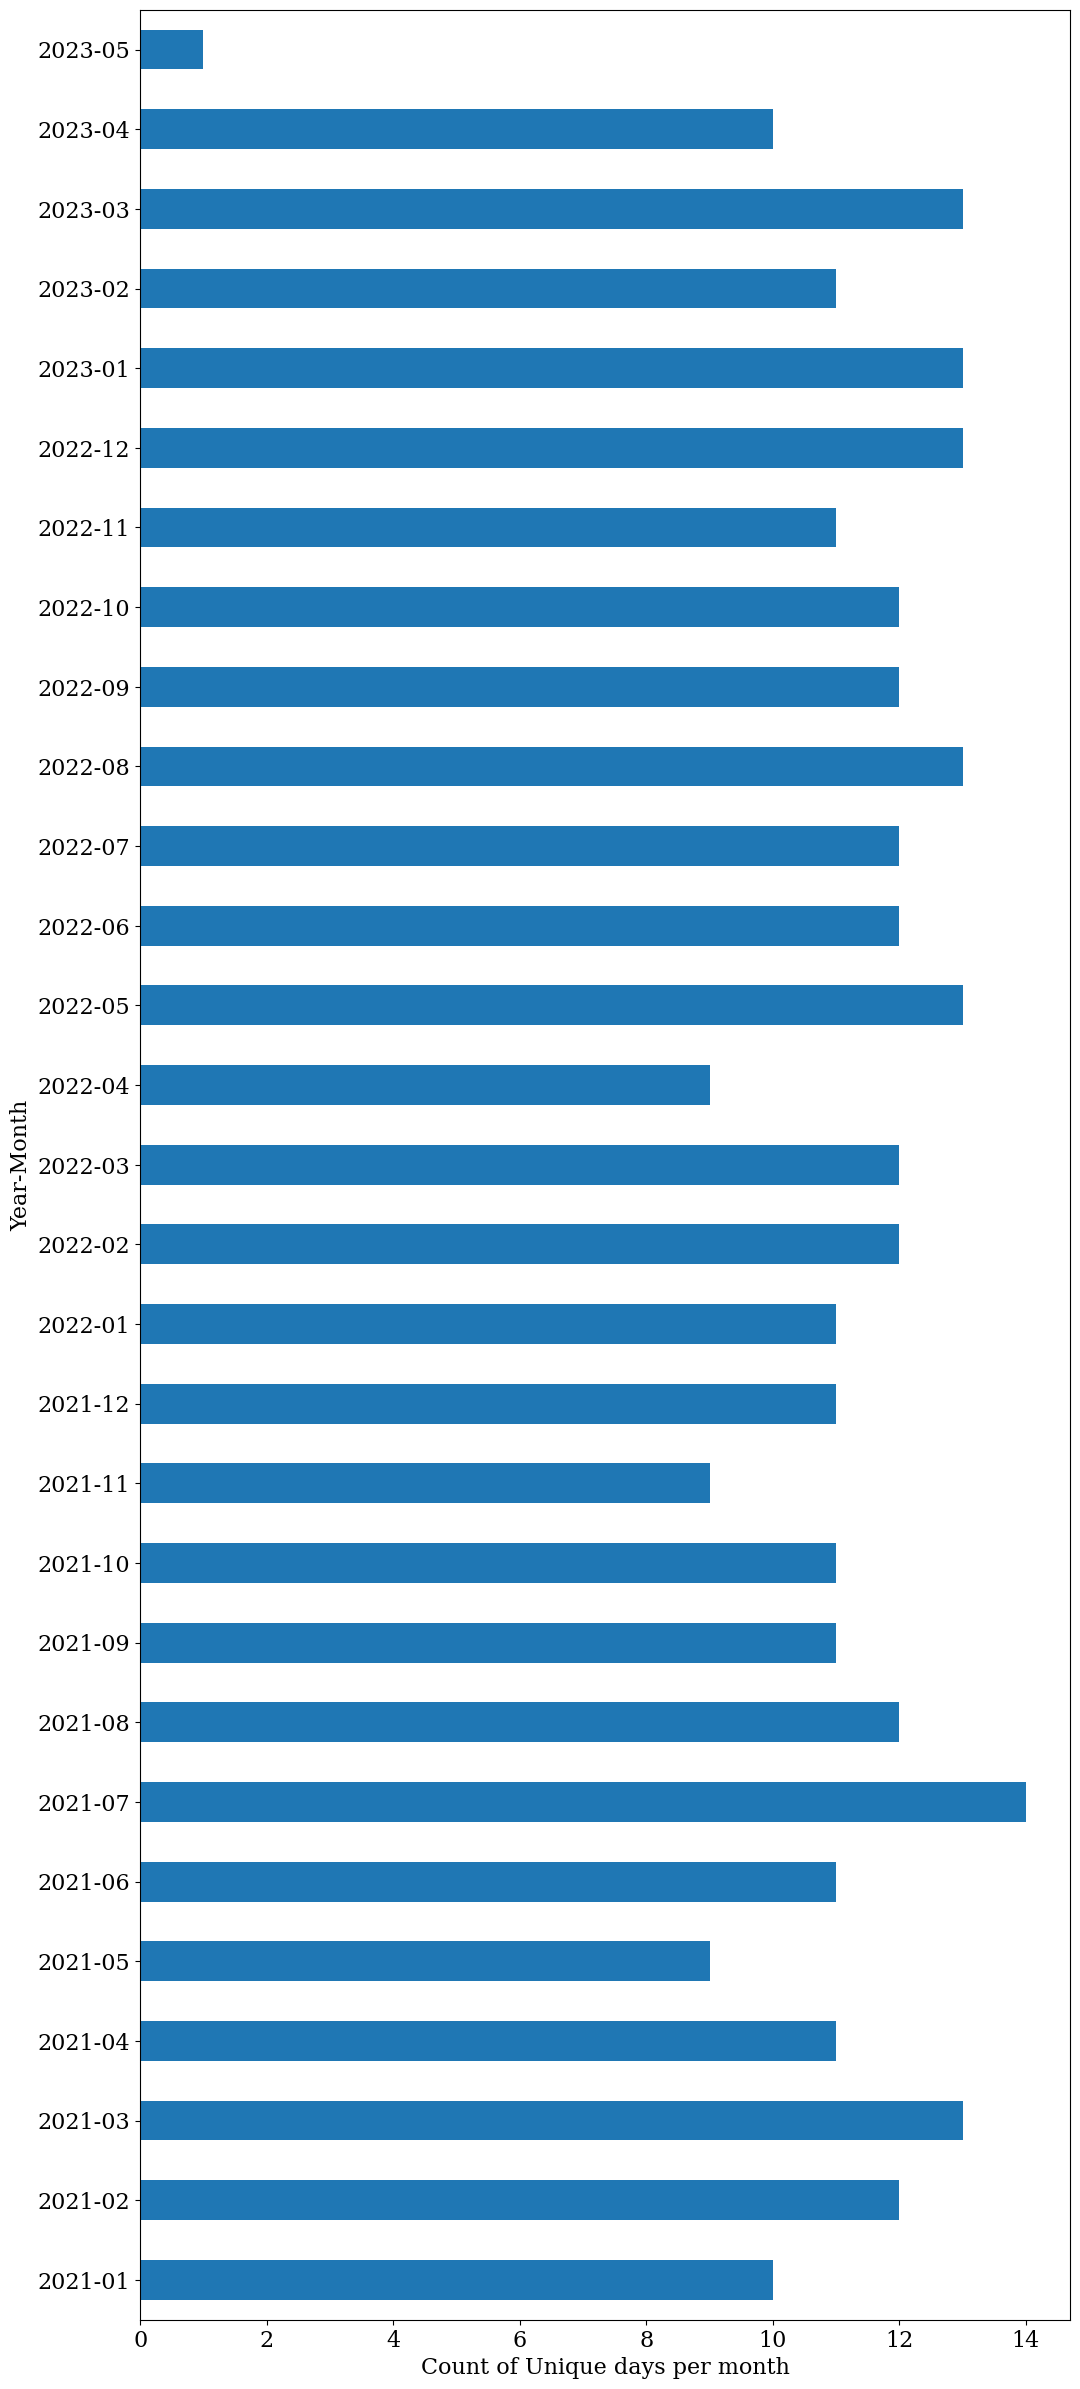

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        10
      2        12
      3        13
      4        11
      5         9
      6        11
      7        14
      8        12
      9        11
      10       11
      11        9
      12       11
2022  1        11
      2        12
      3        12
      4         9
      5        13
      6        12
      7        12
      8        13
      9        12
      10       12
      11       11
      12       13
2023  1        13
      2        11
      3        13
      4        10
      5         1
Name: size, dtype: int64


<IPython.core.display.Javascript object>

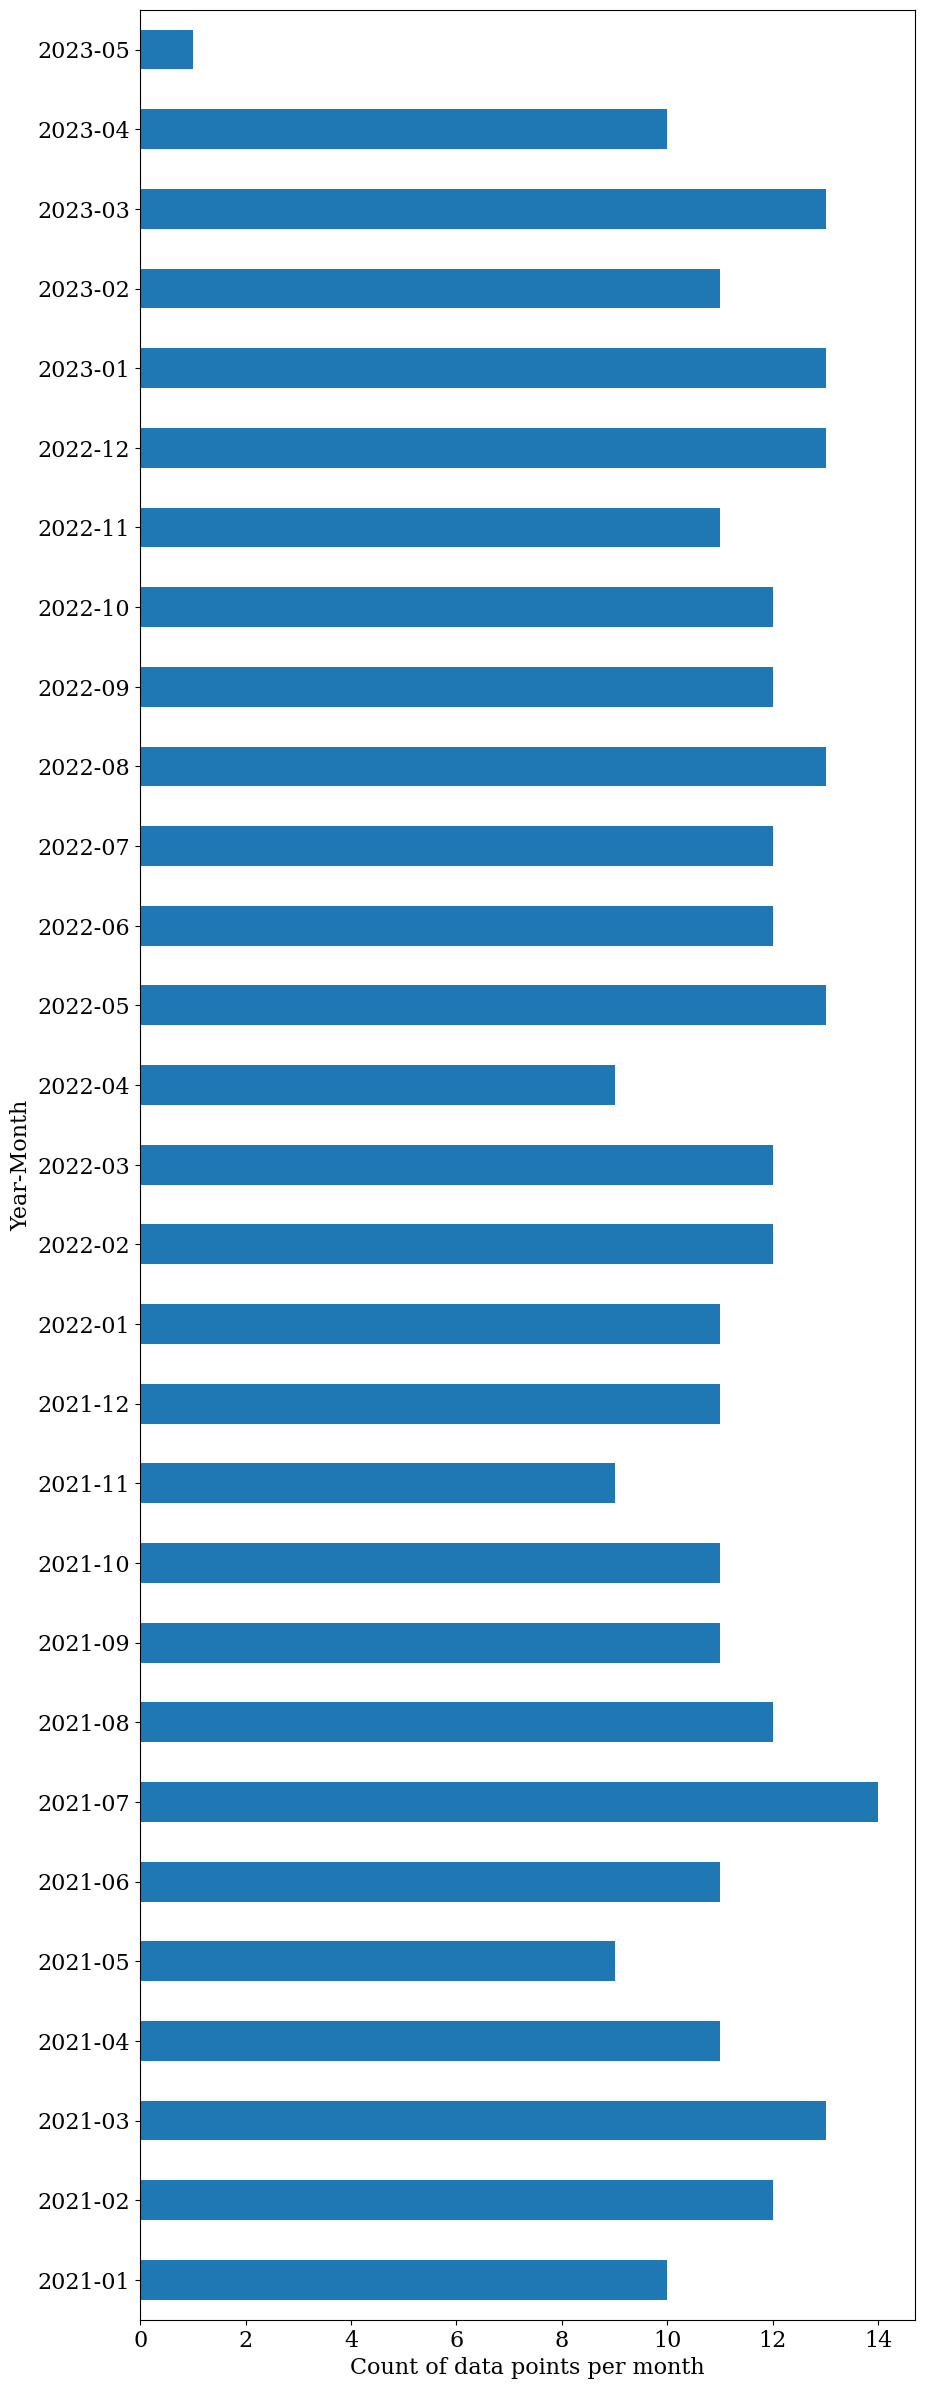

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-5 has the minimum number of days with samples - 1
2021-7 has the maximum number of days with samples - 14


<IPython.core.display.Javascript object>

In [82]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 11, 2022: 11, 2023: 9}

Mean number of observations - all years
11


<IPython.core.display.Javascript object>

In [83]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count     324.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0

<IPython.core.display.Javascript object>

In [84]:
day_counts[["DayCount"]].value_counts()

DayCount
1           324
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
0    2021      1    7         1
1    2021      1   12         1
2    2021      1   14         1
3    2021      1   16         1
4    2021      1   19         1
..    ...    ...  ...       ...
319  2023      4   20         1
320  2023      4   25         1
321  2023      4   27         1
322  2023      4   29         1
323  2023      5    2         1

[324 rows x 4 columns]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

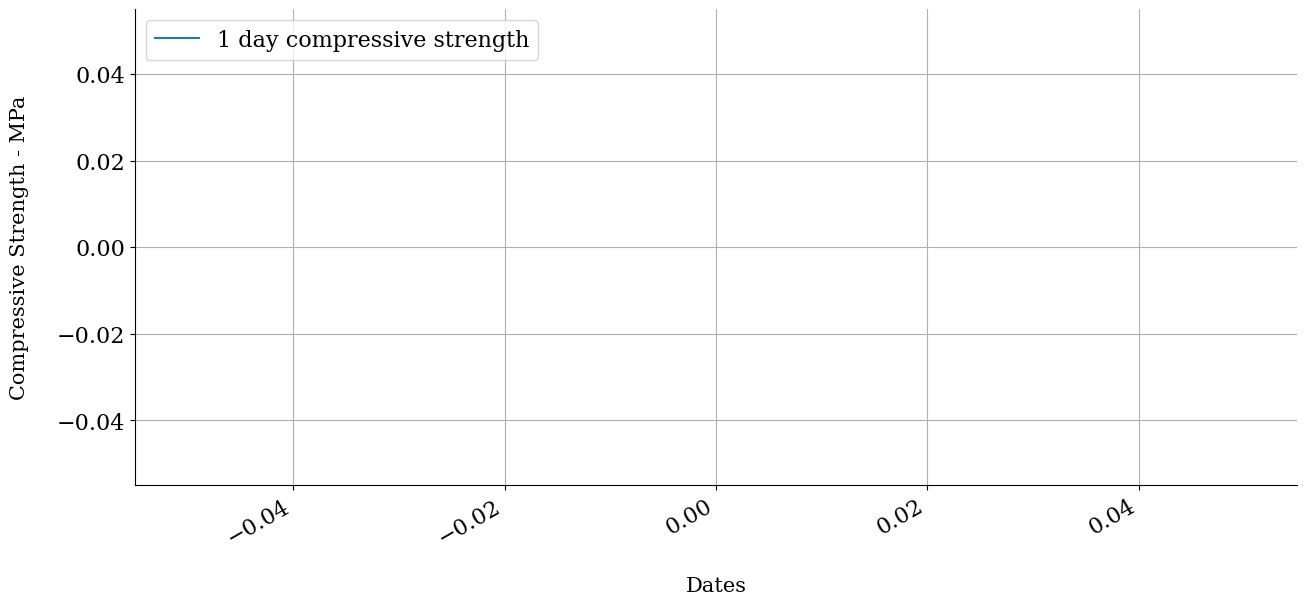

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

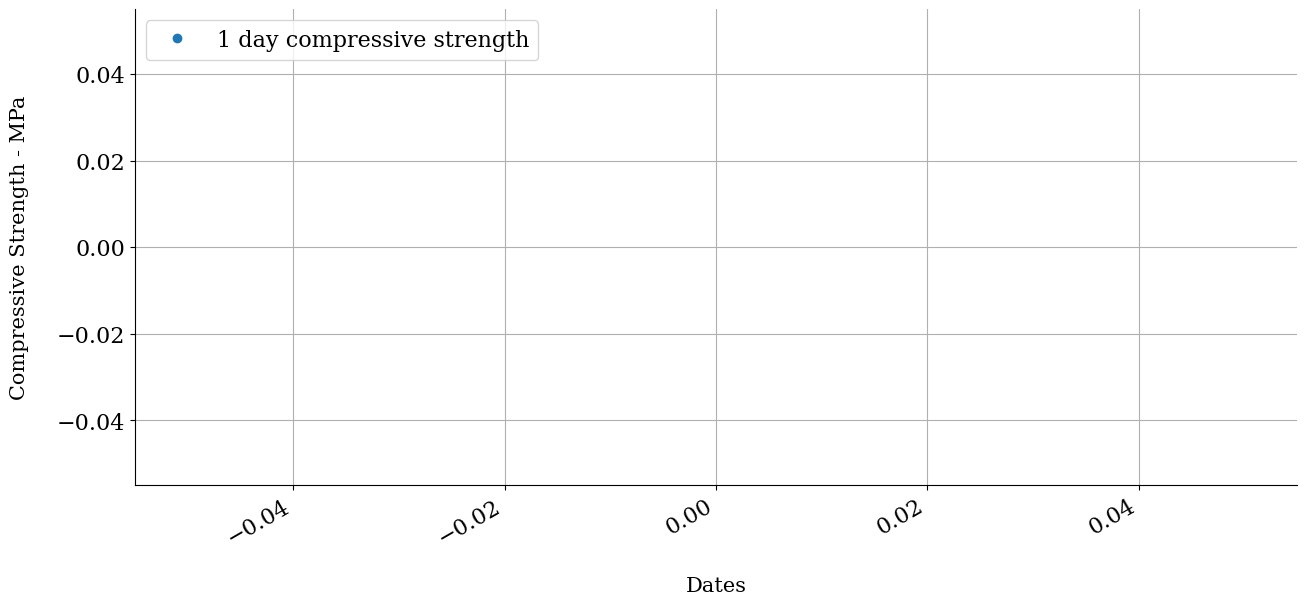

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

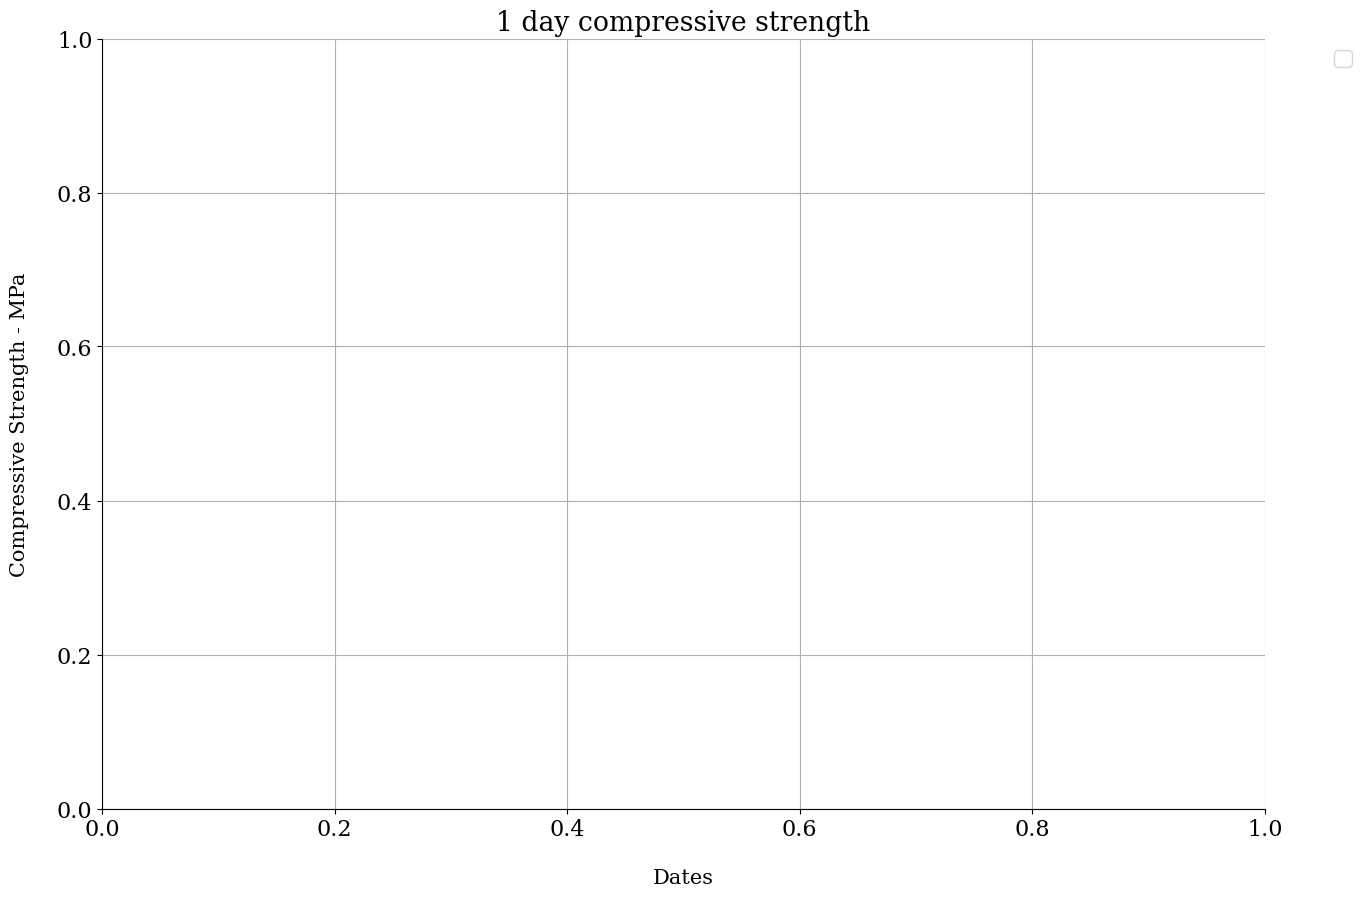

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

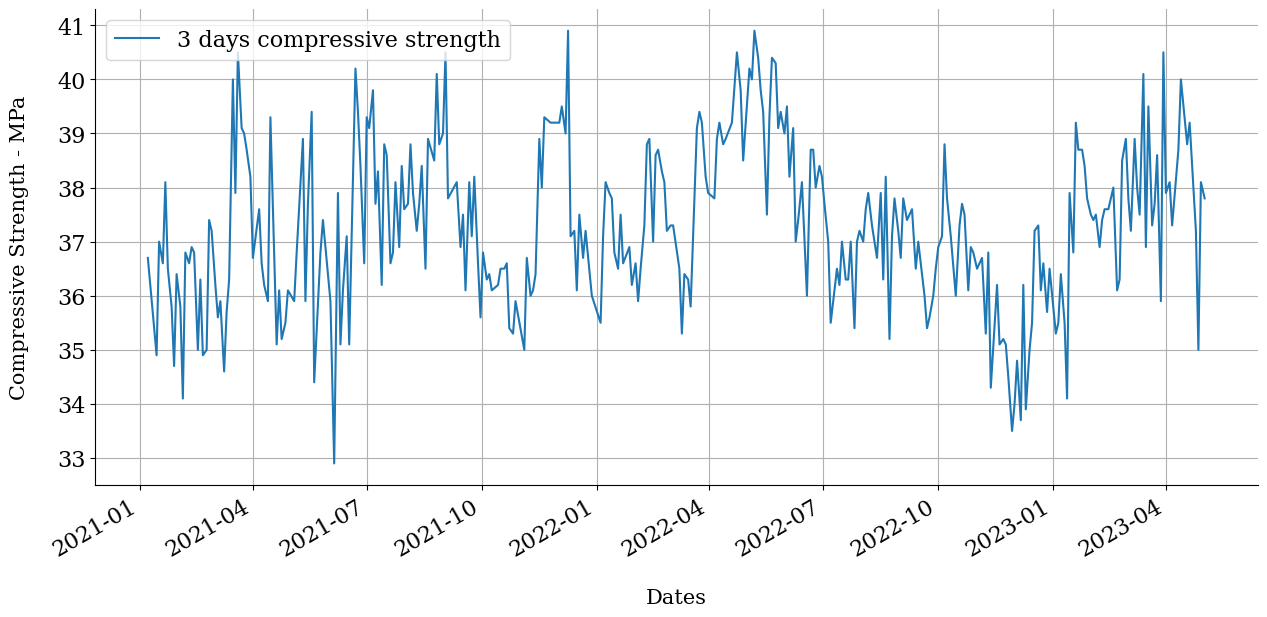

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

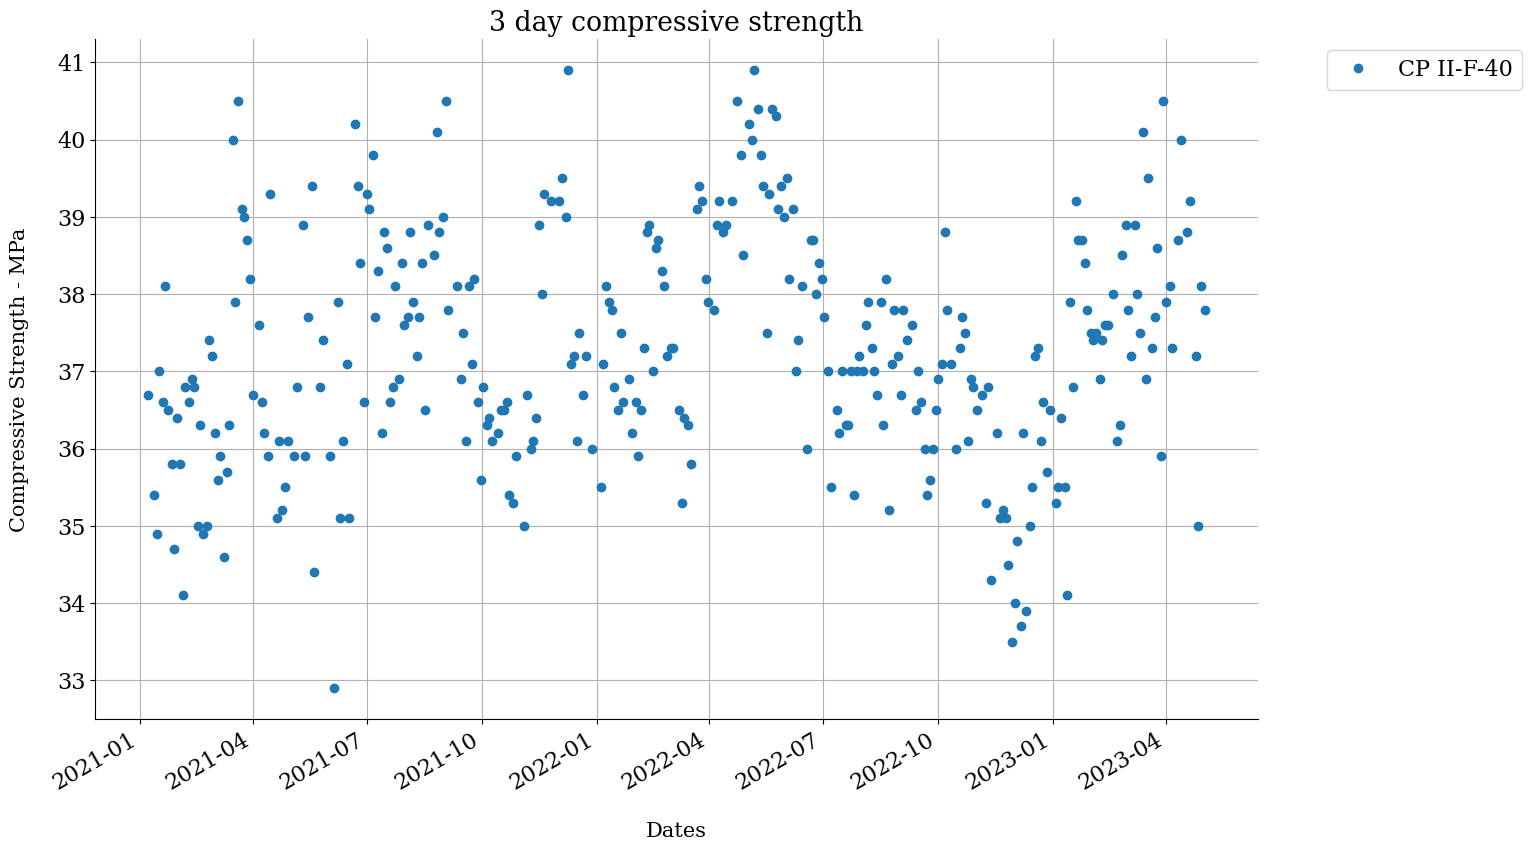

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

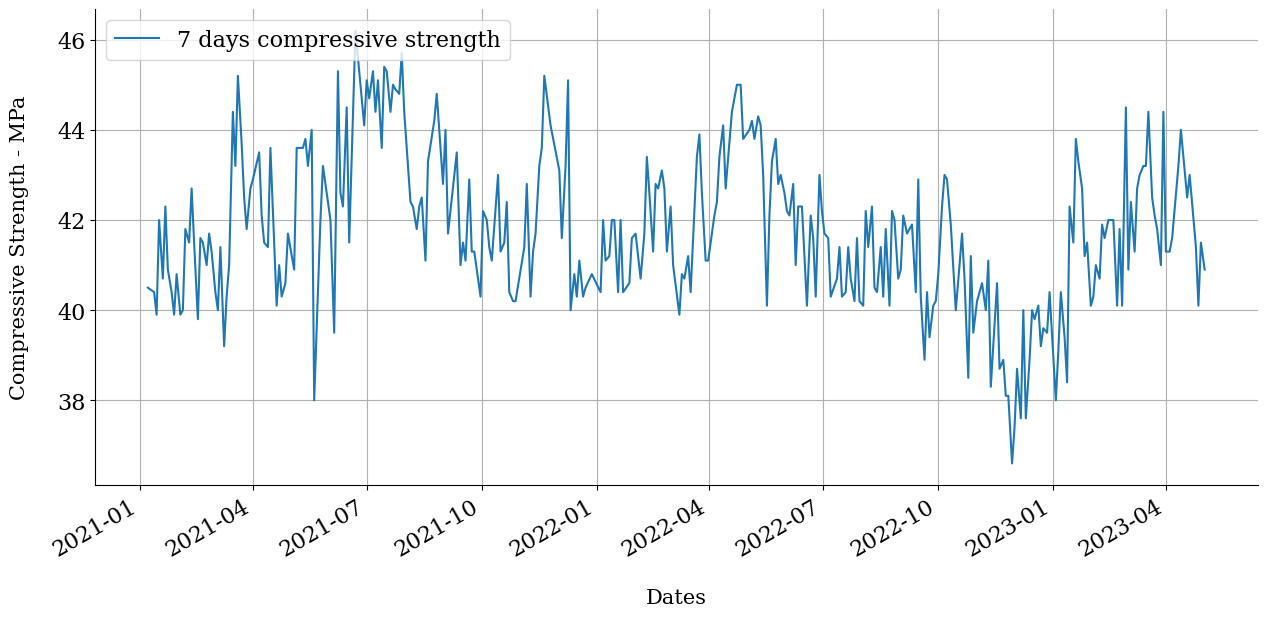

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

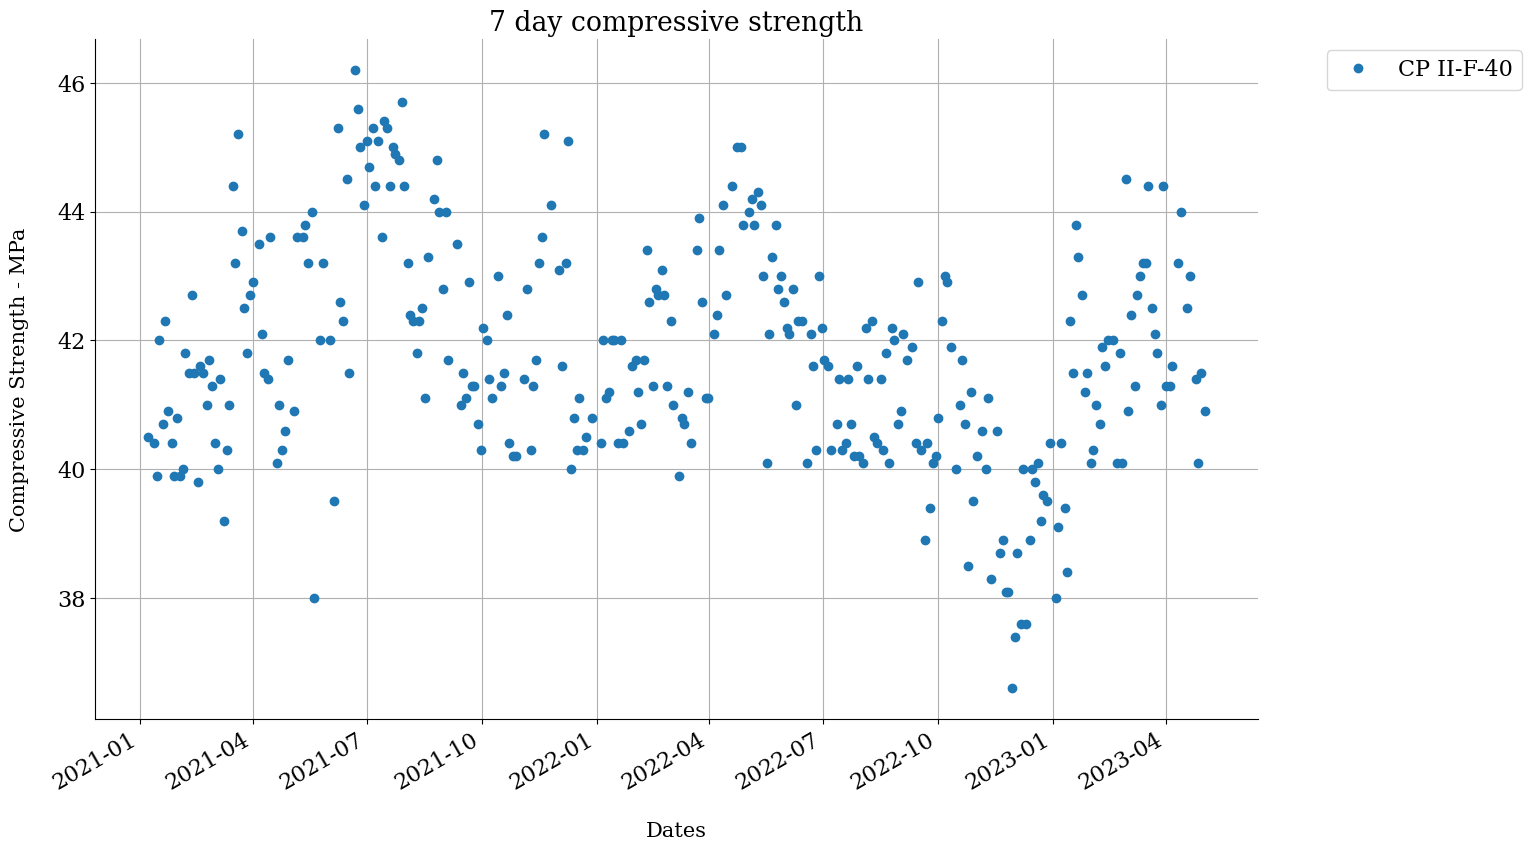

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

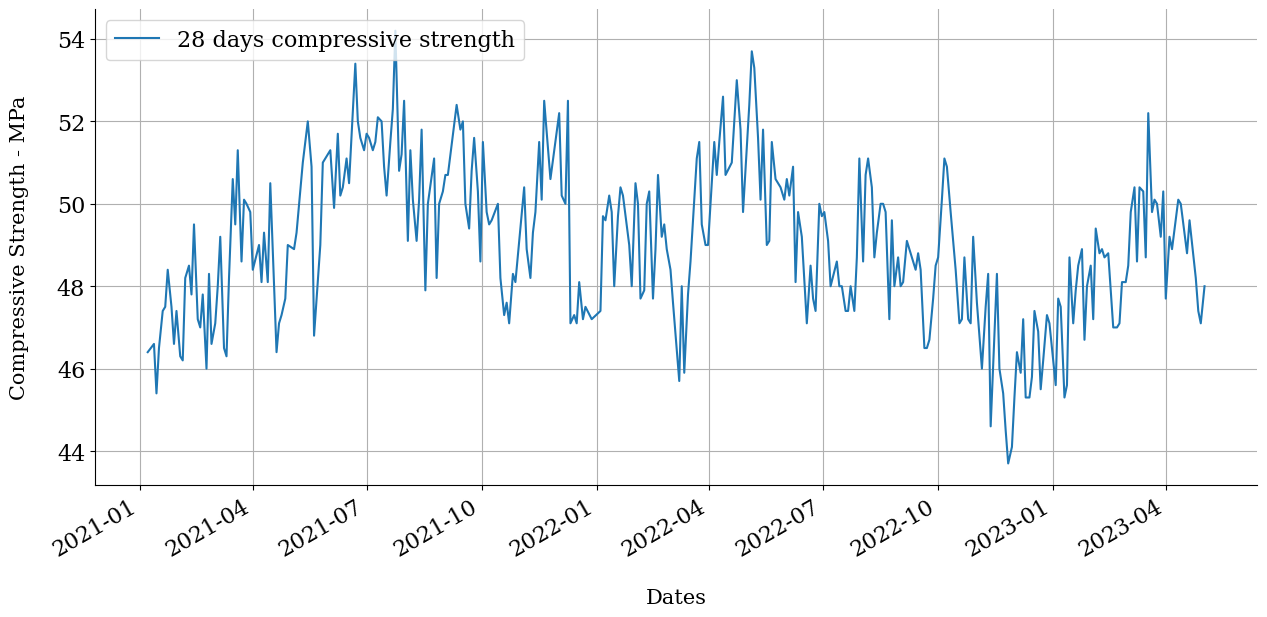

<IPython.core.display.Javascript object>

In [93]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

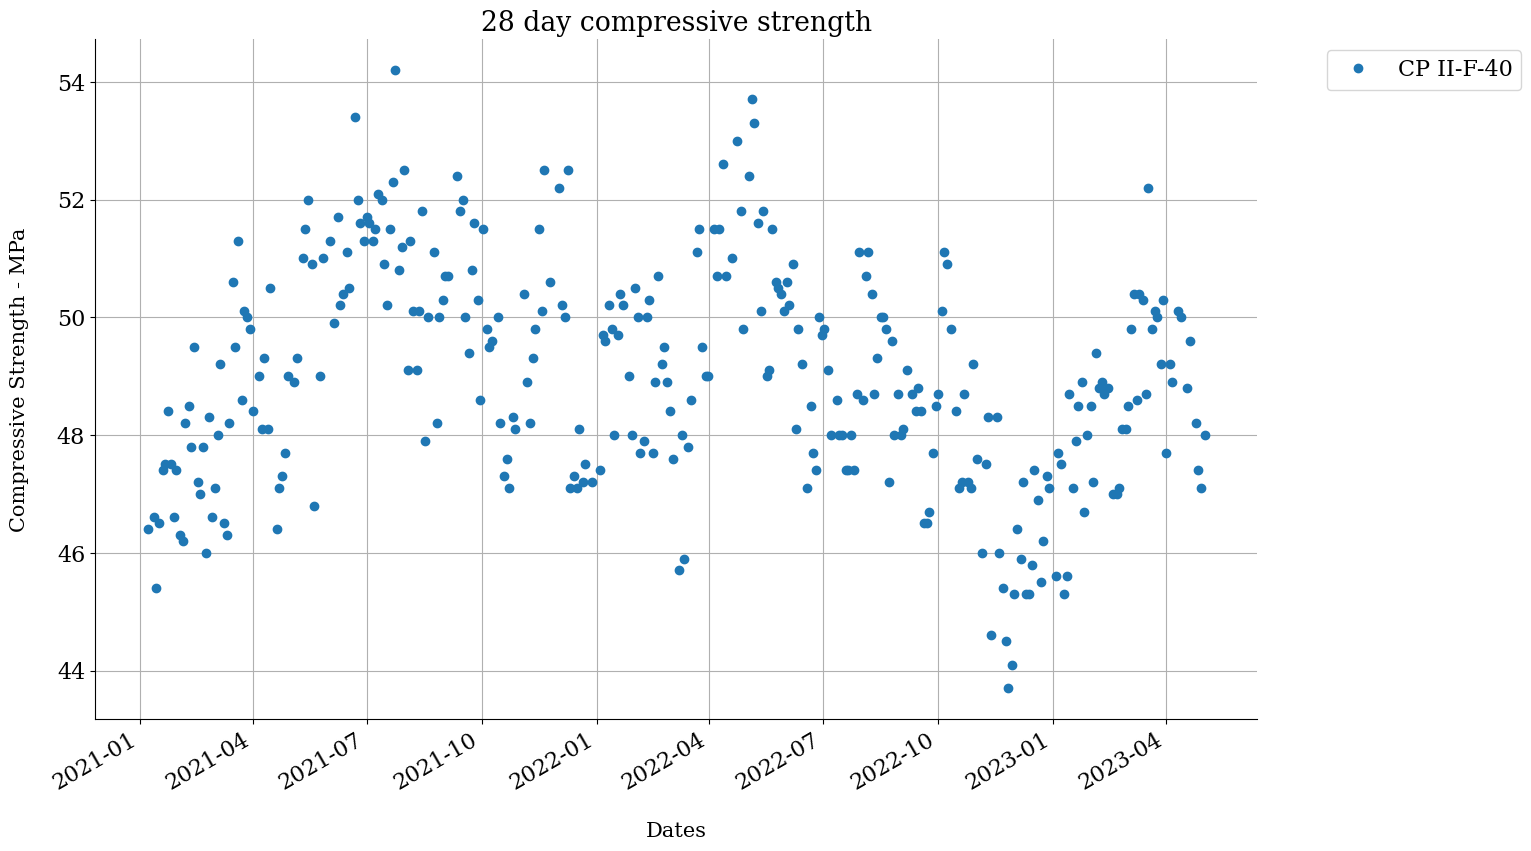

<IPython.core.display.Javascript object>

In [94]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()